# Função Gama


A Função Gama utilizada nesse programa tem como intuito receber os dados de posições e de doses de arquivos .csv, para tratá-los corretamente e aplicá-los em uma função matemática. 

Assim, seu retorno nos devolve os pontos como "aprovados" ou "reprovados", no sentido de verificar em quais pontos as doses são qualificadas, mediante comparação entre as calculadas e medidas.

In [1231]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [1232]:
# Valores de input da diferença percentual de doses e DTA
delta_Dm = float(input("Insira aqui a diferença percentual de dose: "))
delta_dM = float(input("Insira agora o valor de DTA: "))

In [1233]:
def gamma_index_function(rc, rm, Dc, Dm, max_Dm):
    '''
    Função Gama que será utilizada ao longo do código,
    recebendo como parâmetros as medidas de posições (cm) 
    e doses (cGy) calculadas e medidas. 
    '''
    r_diff_x = np.sqrt(rc[0]**2 + rc[1]**2)
    r_diff_y = np.sqrt(rm[0]**2 + rm[1]**2)
    r_diff = abs(r_diff_x - r_diff_y) # cálculo do módulo das posições
    D_diff = abs(Dc - Dm)/(max_Dm) # diferença entre doses
    
    F_g = np.sqrt((r_diff/delta_dM)**2 + (D_diff/delta_Dm)**2) # cálculo da função gamma

    return F_g

def position_module(row, max_Dm):
    '''
    Função para calcular o módulo de posição, que chama a
    função Gamma já passando os parâmetros necessários.
    '''
    rm_x = row['Ponto Medido X (rm_x)']
    rm_y = row['Ponto Medido Y (rm_y)']
    rc_x = row['Ponto Calculado X (rc_x)']
    rc_y = row['Ponto Calculado Y (rc_y)']
    
    rm = (rm_x, rm_y) # coordenadas da posição Rm
    rc = (rc_x, rc_y) # coordenadas da posição Rc
    
    return gamma_index_function(rc, rm, float(row['Dose Calculada (Dc)']), float(row['Dose Medida (Dm)']), max_Dm)

## *Medidas de Agosto/2022*

* Abaixo se encontra a análise dos 25 medidos realizadas em agosto/2022, onde foram calculados os valores de gamma-index dos 49 pontos calculados sobre e na vizinhança de cada ponto medido,
* Também foi feita a análise dos resultados a partir dos valores de menor gamma-index destes valores.

### Resultados - 1ª Simulação

#### Leitura dos dados

* Lê os dados do arquivo .csv com os dados do mês de Agosto.

In [1234]:
# Leitura dos dados do mês de Agosto refente à 1ª Simulação e criação do Dataframe
august_data_sim_1 = './Agosto_22/Matrizes das Simulações para o Programa - Simulação 1 - Agosto.csv'
df_augustData_sim_1 = pd.read_csv(august_data_sim_1)

# Informações do Dataframe dos dados
print(df_augustData_sim_1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1225 entries, 0 to 1224
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   TLD                       25 non-null     float64
 1   Dose Medida (Dm)          1225 non-null   int64  
 2   Dose Calculada (Dc)       1225 non-null   int64  
 3   Ponto Medido X (rm_x)     1225 non-null   int64  
 4   Ponto Medido Y (rm_y)     1225 non-null   int64  
 5   Ponto Calculado X (rc_x)  1225 non-null   int64  
 6   Ponto Calculado Y (rc_y)  1225 non-null   int64  
dtypes: float64(1), int64(6)
memory usage: 67.1 KB
None


#### Valores de Gamma-Index

* Analisa os 49 pontos calculados para cada ponto medido calculando o gamma-index para cada um desses pontos,
* Retorna o menor gamma-index dos calculados para cada ponto medido, com seu respectivo ponto medido.

In [1235]:
# Obtém o valor máximo dentre as doses medidas
max_Dm = df_augustData_sim_1['Dose Medida (Dm)'].max()

# Criação do dicionário que irá salvar os valores gamma-index para cada ponto
gamma_index_aug_1 = {}

In [1236]:
# Calcula os valores de gamma-index de cada ponto e salva no dicionário os menores valores
for i in range(0, len(df_augustData_sim_1), 49):
    group_df = df_augustData_sim_1.iloc[i:i+49]  # Selecionar grupo de 49 pontos
    min_gamma = group_df.apply(lambda row: position_module(row, max_Dm), axis=1).min()
       
    # Salva o menor valor de gamma-index no dicionário
    x_coord = group_df.iloc[0]['Ponto Medido X (rm_x)']
    y_coord = group_df.iloc[0]['Ponto Medido Y (rm_y)']
    gamma_index_aug_1['{},{}'.format(x_coord, y_coord)] = min_gamma.round(2)

#### Análise dos valores obtidos

* Retorna quais valores estão 'acima' e 'abaixo ou igual' a 1, classificando-os como 'pontos reprovados' e 'pontos aprovados', respectivamente,
* Também cria um dataframe dos pontos analisados com seus respectivos gamma-index.

In [1237]:
# Contar a quantidade de valores menores ou iguais a 1 e a quantidade de valores maiores que 1
menores_ou_iguais_que_um = sum(1 for valor in gamma_index_aug_1.values() if valor <= 1)

maiores_que_um = sum(1 for valor in gamma_index_aug_1.values() if valor > 1)

# Total de valores do gamma-index
total_valores = len(gamma_index_aug_1)

# Calcular as porcentagens dos valores acima
porcentagem_menores_que_um = (menores_ou_iguais_que_um / total_valores) * 100

porcentagem_maiores_que_um = (maiores_que_um / total_valores) * 100

In [1238]:
# Imprimir os resultados
print("Valores referentes às medidas da 1ª Simulação de Agosto")
print()
print("Total de pontos analisados:", total_valores)
print(f"Diferença de percentual de dose: {delta_Dm*100}%")
print(f"DTA utilizado: {delta_dM} mm")
print()
print("Quantidade de valores aprovados, ou seja, menores ou iguais a um:", menores_ou_iguais_que_um)
print("Quantidade de valores reprovados, ou seja, maiores que um:", maiores_que_um)
print()
print(f"Porcentagem de valores aprovados: {porcentagem_menores_que_um}%")
print(f"Porcentagem de valores reprovados: {porcentagem_maiores_que_um}%")

Valores referentes às medidas da 1ª Simulação de Agosto

Total de pontos analisados: 25
Diferença de percentual de dose: 2.0%
DTA utilizado: 2.0 mm

Quantidade de valores aprovados, ou seja, menores ou iguais a um: 25
Quantidade de valores reprovados, ou seja, maiores que um: 0

Porcentagem de valores aprovados: 100.0%
Porcentagem de valores reprovados: 0.0%


#### Visualização dos dados tratados

* Visualiza tabela final para cada simulação, com os pontos medido e seu menor valor de gamma-index calculado.

In [1239]:
# Cria um dataframe para os valores obtidos da primeira simulação
df_augustGammaIndex_sim_1 = pd.DataFrame(list(gamma_index_aug_1.items()), columns=['Pontos Medidos (X,Y)', 'Índice Gama'])

In [1240]:
# Visualiza o DataFrame com os devidos tratamentos
print(df_augustGammaIndex_sim_1.head(25))

   Pontos Medidos (X,Y)  Índice Gama
0             18.0,18.0         0.18
1              9.0,18.0         0.11
2              0.0,18.0         0.30
3             -9.0,18.0         0.29
4            -18.0,18.0         0.18
5              18.0,9.0         0.38
6               9.0,9.0         0.39
7               0.0,9.0         0.22
8              -9.0,9.0         0.87
9             -18.0,9.0         0.24
10             18.0,0.0         0.12
11              9.0,0.0         0.60
12              0.0,0.0         0.11
13             -9.0,0.0         0.47
14            -18.0,0.0         0.82
15            18.0,-9.0         0.32
16             9.0,-9.0         0.94
17             0.0,-9.0         0.26
18            -9.0,-9.0         0.87
19           -18.0,-9.0         0.39
20           18.0,-18.0         0.20
21            9.0,-18.0         0.24
22            0.0,-18.0         0.20
23           -9.0,-18.0         0.48
24          -18.0,-18.0         0.08


#### Mapas de Calor dos dados tratados

* Visualização dos mapas de calor dos dados finais, onde é possível relacionar o gamma-index retornado por cada ponto com sua coordenada (x, y).
* As cores mais 'frias', ilustradas por tons da cor verde, indicam que o valor do gamma-index é menor, ou seja, mais próximo de zero. Enquanto que as cores mais 'quentes', ilustrada por tons de vermelho, indicam que o valor do gamma-index é mais próximo (ou maior que) de um.

In [1241]:
# Extrai as coordenadas x, y e valores do Gamma Index
x_coords, y_coords = zip(*[map(float, coord.split(',')) for coord in df_augustGammaIndex_sim_1['Pontos Medidos (X,Y)']])
gamma_index_values = df_augustGammaIndex_sim_1['Índice Gama']

# Cria um DataFrame para os dados
df_heatmapDataAugust_sim_1 = pd.DataFrame({'x': x_coords, 'y': y_coords, 'Índice Gama': gamma_index_values})

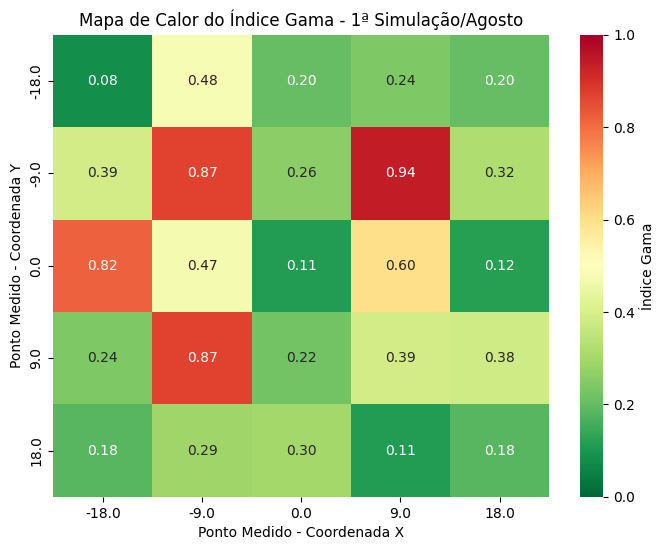

In [1242]:
# Redimensiona o mapa de calor
plt.figure(figsize=(8, 6))

# Cria o mapa de calor usando Seaborn
heatmap = sns.heatmap(df_heatmapDataAugust_sim_1.pivot_table(index='y', columns='x', values='Índice Gama'), cmap='RdYlGn_r', annot=True, fmt=".2f", cbar_kws={'label': 'Índice Gama'}, vmin=0, vmax=1)

# Define rótulos dos eixos
plt.xlabel('Ponto Medido - Coordenada X')
plt.ylabel('Ponto Medido - Coordenada Y')
plt.title('Mapa de Calor do Índice Gama - 1ª Simulação/Agosto')

# Salva o gráfico em um arquivo de imagem (por exemplo, PNG)
plt.savefig(f'heatmapAugust_sim_1_DTA_{delta_dM}.png')

# Plota o mapa de calor
plt.show()

### Resultados - 2ª Simulação

#### Leitura dos dados

* Lê os dados do arquivo .csv com os dados do mês de Agosto.

In [1243]:
# Leitura dos dados do mês de Agosto refente à 1ª Simulação e criação do Dataframe
august_data_sim_2 = './Agosto_22/Matrizes das Simulações para o Programa - Simulação 2 - Agosto.csv'
df_augustData_sim_2 = pd.read_csv(august_data_sim_2)

# Informações do Dataframe dos dados
print(df_augustData_sim_2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1225 entries, 0 to 1224
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   TLD                       25 non-null     float64
 1   Dose Medida (Dm)          1225 non-null   int64  
 2   Dose Calculada (Dc)       1225 non-null   int64  
 3   Ponto Medido X (rm_x)     1225 non-null   int64  
 4   Ponto Medido Y (rm_y)     1225 non-null   int64  
 5   Ponto Calculado X (rc_x)  1225 non-null   int64  
 6   Ponto Calculado Y (rc_y)  1225 non-null   int64  
dtypes: float64(1), int64(6)
memory usage: 67.1 KB
None


#### Valores de Gamma-Index

* Analisa os 49 pontos calculados para cada ponto medido calculando o gamma-index para cada um desses pontos,
* Retorna o menor gamma-index dos calculados para cada ponto medido, com seu respectivo ponto medido.

In [1244]:
# Obtém o valor máximo dentre as doses medidas
max_Dm = df_augustData_sim_2['Dose Medida (Dm)'].max()

# Criação do dicionário que irá salvar os valores gamma-index para cada ponto
gamma_index_aug_2 = {}

In [1245]:
# Calcula os valores de gamma-index de cada ponto e salva no dicionário os menores valores
for i in range(0, len(df_augustData_sim_2), 49):
    group_df = df_augustData_sim_2.iloc[i:i+49]  # Selecionar grupo de 49 pontos
    min_gamma = group_df.apply(lambda row: position_module(row, max_Dm), axis=1).min()
       
    # Salva o menor valor de gamma-index no dicionário
    x_coord = group_df.iloc[0]['Ponto Medido X (rm_x)']
    y_coord = group_df.iloc[0]['Ponto Medido Y (rm_y)']
    gamma_index_aug_2['{},{}'.format(x_coord, y_coord)] = min_gamma.round(2)

#### Análise dos valores obtidos

* Retorna quais valores estão 'acima' e 'abaixo ou igual' a 1, classificando-os como 'pontos reprovados' e 'pontos aprovados', respectivamente,
* Também cria um dataframe dos pontos analisados com seus respectivos gamma-index.

In [1246]:
# Contar a quantidade de valores menores ou iguais a 1 e a quantidade de valores maiores que 1
menores_ou_iguais_que_um = sum(1 for valor in gamma_index_aug_2.values() if valor <= 1)

maiores_que_um = sum(1 for valor in gamma_index_aug_2.values() if valor > 1)

# Total de valores do gamma-index
total_valores = len(gamma_index_aug_2)

# Calcular as porcentagens dos valores acima
porcentagem_menores_que_um = (menores_ou_iguais_que_um / total_valores) * 100

porcentagem_maiores_que_um = (maiores_que_um / total_valores) * 100

In [1247]:
# Imprimir os resultados
print("Valores referentes às medidas da 2ª Simulação de Agosto")
print()
print("Total de pontos analisados:", total_valores)
print(f"Diferença de percentual de dose: {delta_Dm*100}%")
print(f"DTA utilizado: {delta_dM} mm")
print()
print("Quantidade de valores aprovados, ou seja, menores ou iguais a um:", menores_ou_iguais_que_um)
print("Quantidade de valores reprovados, ou seja, maiores que um:", maiores_que_um)
print()
print(f"Porcentagem de valores aprovados: {porcentagem_menores_que_um}%")
print(f"Porcentagem de valores reprovados: {porcentagem_maiores_que_um}%")

Valores referentes às medidas da 2ª Simulação de Agosto

Total de pontos analisados: 25
Diferença de percentual de dose: 2.0%
DTA utilizado: 2.0 mm

Quantidade de valores aprovados, ou seja, menores ou iguais a um: 20
Quantidade de valores reprovados, ou seja, maiores que um: 5

Porcentagem de valores aprovados: 80.0%
Porcentagem de valores reprovados: 20.0%


#### Visualização dos dados tratados

* Visualiza tabela final para cada simulação, com os pontos medido e seu menor valor de gamma-index calculado.

In [1248]:
# Cria um dataframe para os valores obtidos da primeira simulação
df_augustGammaIndex_sim_2 = pd.DataFrame(list(gamma_index_aug_2.items()), columns=['Pontos Medidos (X,Y)', 'Índice Gama'])

In [1249]:
# Visualiza o DataFrame com os devidos tratamentos
print(df_augustGammaIndex_sim_2.head(25))

   Pontos Medidos (X,Y)  Índice Gama
0             18.0,18.0         0.11
1              9.0,18.0         0.18
2              0.0,18.0         1.57
3             -9.0,18.0         0.15
4            -18.0,18.0         0.02
5              18.0,9.0         0.00
6               9.0,9.0         0.12
7               0.0,9.0         1.54
8              -9.0,9.0         0.04
9             -18.0,9.0         0.07
10             18.0,0.0         0.25
11              9.0,0.0         0.12
12              0.0,0.0         1.22
13             -9.0,0.0         0.38
14            -18.0,0.0         0.16
15            18.0,-9.0         0.06
16             9.0,-9.0         0.13
17             0.0,-9.0         1.12
18            -9.0,-9.0         0.10
19           -18.0,-9.0         0.03
20           18.0,-18.0         0.09
21            9.0,-18.0         0.16
22            0.0,-18.0         1.05
23           -9.0,-18.0         0.19
24          -18.0,-18.0         0.19


#### Mapas de Calor dos dados tratados

* Visualização dos mapas de calor dos dados finais, onde é possível relacionar o gamma-index retornado por cada ponto com sua coordenada (x, y).
* As cores mais 'frias', ilustradas por tons da cor verde, indicam que o valor do gamma-index é menor, ou seja, mais próximo de zero. Enquanto que as cores mais 'quentes', ilustrada por tons de vermelho, indicam que o valor do gamma-index é mais próximo (ou maior que) de um.

In [1250]:
# Extrai as coordenadas x, y e valores do Gamma Index
x_coords, y_coords = zip(*[map(float, coord.split(',')) for coord in df_augustGammaIndex_sim_2['Pontos Medidos (X,Y)']])
gamma_index_values = df_augustGammaIndex_sim_2['Índice Gama']

# Cria um DataFrame para os dados
df_heatmapDataAugust_sim_2 = pd.DataFrame({'x': x_coords, 'y': y_coords, 'Índice Gama': gamma_index_values})

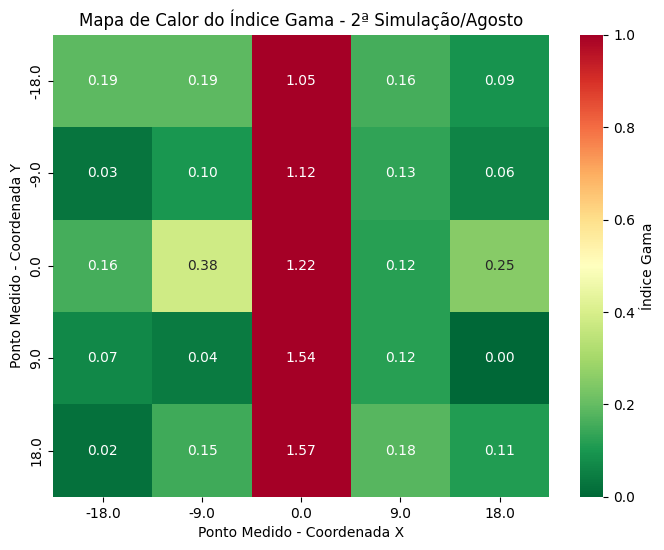

In [1251]:
# Redimensiona o mapa de calor
plt.figure(figsize=(8, 6))

# Cria o mapa de calor usando Seaborn
heatmap = sns.heatmap(df_heatmapDataAugust_sim_2.pivot_table(index='y', columns='x', values='Índice Gama'), cmap='RdYlGn_r', annot=True, fmt=".2f", cbar_kws={'label': 'Índice Gama'}, vmin=0, vmax=1)

# Define rótulos dos eixos
plt.xlabel('Ponto Medido - Coordenada X')
plt.ylabel('Ponto Medido - Coordenada Y')
plt.title('Mapa de Calor do Índice Gama - 2ª Simulação/Agosto')

# Salva o gráfico em um arquivo de imagem (por exemplo, PNG)
plt.savefig(f'heatmapAugust_sim_2_DTA_{delta_dM}.png')

# Plota o mapa de calor
plt.show()

### Resultados - 3ª Simulação

#### Leitura dos dados

* Lê os dados do arquivo .csv com os dados do mês de Agosto.

In [1252]:
# Leitura dos dados do mês de Agosto refente à 1ª Simulação e criação do Dataframe
august_data_sim_3 = './Agosto_22/Matrizes das Simulações para o Programa - Simulação 3 - Agosto.csv'
df_augustData_sim_3 = pd.read_csv(august_data_sim_3)

# Informações do Dataframe dos dados
print(df_augustData_sim_3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1225 entries, 0 to 1224
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   TLD                       25 non-null     float64
 1   Dose Medida (Dm)          1225 non-null   int64  
 2   Dose Calculada (Dc)       1225 non-null   int64  
 3   Ponto Medido X (rm_x)     1225 non-null   int64  
 4   Ponto Medido Y (rm_y)     1225 non-null   int64  
 5   Ponto Calculado X (rc_x)  1225 non-null   int64  
 6   Ponto Calculado Y (rc_y)  1225 non-null   int64  
dtypes: float64(1), int64(6)
memory usage: 67.1 KB
None


#### Valores de Gamma-Index

* Analisa os 49 pontos calculados para cada ponto medido calculando o gamma-index para cada um desses pontos,
* Retorna o menor gamma-index dos calculados para cada ponto medido, com seu respectivo ponto medido.

In [1253]:
# Obtém o valor máximo dentre as doses medidas
max_Dm = df_augustData_sim_3['Dose Medida (Dm)'].max()

# Criação do dicionário que irá salvar os valores gamma-index para cada ponto
gamma_index_aug_3 = {}

In [1254]:
# Calcula os valores de gamma-index de cada ponto e salva no dicionário os menores valores
for i in range(0, len(df_augustData_sim_3), 49):
    group_df = df_augustData_sim_3.iloc[i:i+49]  # Selecionar grupo de 49 pontos
    min_gamma = group_df.apply(lambda row: position_module(row, max_Dm), axis=1).min()
       
    # Salva o menor valor de gamma-index no dicionário
    x_coord = group_df.iloc[0]['Ponto Medido X (rm_x)']
    y_coord = group_df.iloc[0]['Ponto Medido Y (rm_y)']
    gamma_index_aug_3['{},{}'.format(x_coord, y_coord)] = min_gamma.round(2)

#### Análise dos valores obtidos

* Retorna quais valores estão 'acima' e 'abaixo ou igual' a 1, classificando-os como 'pontos reprovados' e 'pontos aprovados', respectivamente,
* Também cria um dataframe dos pontos analisados com seus respectivos gamma-index.

In [1255]:
# Contar a quantidade de valores menores ou iguais a 1 e a quantidade de valores maiores que 1
menores_ou_iguais_que_um = sum(1 for valor in gamma_index_aug_3.values() if valor <= 1)

maiores_que_um = sum(1 for valor in gamma_index_aug_3.values() if valor > 1)

# Total de valores do gamma-index
total_valores = len(gamma_index_aug_3)

# Calcular as porcentagens dos valores acima
porcentagem_menores_que_um = (menores_ou_iguais_que_um / total_valores) * 100

porcentagem_maiores_que_um = (maiores_que_um / total_valores) * 100

In [1256]:
# Imprimir os resultados
print("Valores referentes às medidas da 3ª Simulação de Agosto")
print()
print("Total de pontos analisados:", total_valores)
print(f"Diferença de percentual de dose: {delta_Dm*100}%")
print(f"DTA utilizado: {delta_dM} mm")
print()
print("Quantidade de valores aprovados, ou seja, menores ou iguais a um:", menores_ou_iguais_que_um)
print("Quantidade de valores reprovados, ou seja, maiores que um:", maiores_que_um)
print()
print(f"Porcentagem de valores aprovados: {porcentagem_menores_que_um}%")
print(f"Porcentagem de valores reprovados: {porcentagem_maiores_que_um}%")

Valores referentes às medidas da 3ª Simulação de Agosto

Total de pontos analisados: 25
Diferença de percentual de dose: 2.0%
DTA utilizado: 2.0 mm

Quantidade de valores aprovados, ou seja, menores ou iguais a um: 21
Quantidade de valores reprovados, ou seja, maiores que um: 4

Porcentagem de valores aprovados: 84.0%
Porcentagem de valores reprovados: 16.0%


#### Visualização dos dados tratados

* Visualiza tabela final para cada simulação, com os pontos medido e seu menor valor de gamma-index calculado.

In [1257]:
# Cria um dataframe para os valores obtidos da primeira simulação
df_augustGammaIndex_sim_3 = pd.DataFrame(list(gamma_index_aug_3.items()), columns=['Pontos Medidos (X,Y)', 'Índice Gama'])

In [1258]:
# Visualiza o DataFrame com os devidos tratamentos
print(df_augustGammaIndex_sim_3.head(25))

   Pontos Medidos (X,Y)  Índice Gama
0             18.0,18.0         0.08
1              9.0,18.0         0.11
2              0.0,18.0         0.19
3             -9.0,18.0         0.10
4            -18.0,18.0         0.11
5              18.0,9.0         0.22
6               9.0,9.0         0.17
7               0.0,9.0         0.29
8              -9.0,9.0         0.10
9             -18.0,9.0         0.15
10             18.0,0.0         1.13
11              9.0,0.0         1.37
12              0.0,0.0         1.05
13             -9.0,0.0         1.02
14            -18.0,0.0         1.00
15            18.0,-9.0         0.04
16             9.0,-9.0         0.24
17             0.0,-9.0         0.19
18            -9.0,-9.0         0.32
19           -18.0,-9.0         0.16
20           18.0,-18.0         0.19
21            9.0,-18.0         0.21
22            0.0,-18.0         0.15
23           -9.0,-18.0         0.35
24          -18.0,-18.0         0.18


#### Mapas de Calor dos dados tratados

* Visualização dos mapas de calor dos dados finais, onde é possível relacionar o gamma-index retornado por cada ponto com sua coordenada (x, y).
* As cores mais 'frias', ilustradas por tons da cor verde, indicam que o valor do gamma-index é menor, ou seja, mais próximo de zero. Enquanto que as cores mais 'quentes', ilustrada por tons de vermelho, indicam que o valor do gamma-index é mais próximo (ou maior que) de um.

In [1259]:
# Extrai as coordenadas x, y e valores do Gamma Index
x_coords, y_coords = zip(*[map(float, coord.split(',')) for coord in df_augustGammaIndex_sim_3['Pontos Medidos (X,Y)']])
gamma_index_values = df_augustGammaIndex_sim_3['Índice Gama']

# Cria um DataFrame para os dados
df_heatmapDataAugust_sim_3 = pd.DataFrame({'x': x_coords, 'y': y_coords, 'Índice Gama': gamma_index_values})

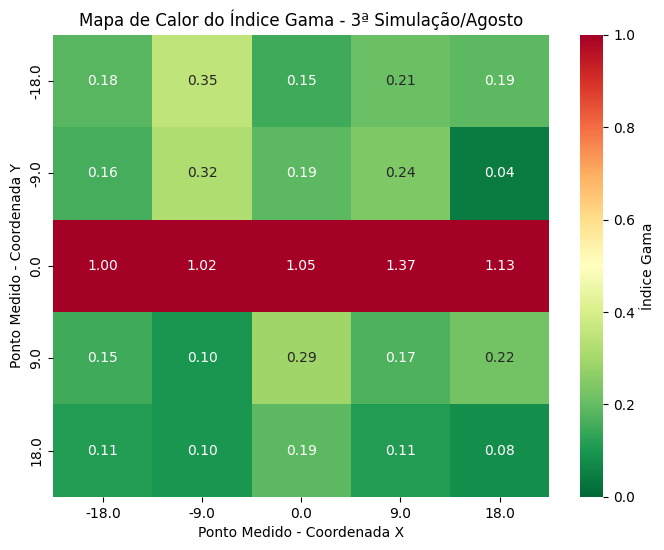

In [1260]:
# Redimensiona o mapa de calor
plt.figure(figsize=(8, 6))

# Cria o mapa de calor usando Seaborn
heatmap = sns.heatmap(df_heatmapDataAugust_sim_3.pivot_table(index='y', columns='x', values='Índice Gama'), cmap='RdYlGn_r', annot=True, fmt=".2f", cbar_kws={'label': 'Índice Gama'}, vmin=0, vmax=1)

# Define rótulos dos eixos
plt.xlabel('Ponto Medido - Coordenada X')
plt.ylabel('Ponto Medido - Coordenada Y')
plt.title('Mapa de Calor do Índice Gama - 3ª Simulação/Agosto')

# Salva o gráfico em um arquivo de imagem (por exemplo, PNG)
plt.savefig(f'heatmapAugust_sim_3_DTA_{delta_dM}.png')

# Plota o mapa de calor
plt.show()

### Resultados - 4ª Simulação

#### Leitura dos dados

* Lê os dados do arquivo .csv com os dados do mês de Agosto.

In [1261]:
# Leitura dos dados do mês de Agosto refente à 1ª Simulação e criação do Dataframe
august_data_sim_4 = './Agosto_22/Matrizes das Simulações para o Programa - Simulação 4 - Agosto.csv'
df_augustData_sim_4 = pd.read_csv(august_data_sim_4)

# Informações do Dataframe dos dados
print(df_augustData_sim_4.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1225 entries, 0 to 1224
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   TLD                       25 non-null     float64
 1   Dose Medida (Dm)          1225 non-null   int64  
 2   Dose Calculada (Dc)       1225 non-null   int64  
 3   Ponto Medido X (rm_x)     1225 non-null   int64  
 4   Ponto Medido Y (rm_y)     1225 non-null   int64  
 5   Ponto Calculado X (rc_x)  1225 non-null   int64  
 6   Ponto Calculado Y (rc_y)  1225 non-null   int64  
dtypes: float64(1), int64(6)
memory usage: 67.1 KB
None


#### Valores de Gamma-Index

* Analisa os 49 pontos calculados para cada ponto medido calculando o gamma-index para cada um desses pontos,
* Retorna o menor gamma-index dos calculados para cada ponto medido, com seu respectivo ponto medido.

In [1262]:
# Obtém o valor máximo dentre as doses medidas
max_Dm = df_augustData_sim_4['Dose Medida (Dm)'].max()

# Criação do dicionário que irá salvar os valores gamma-index para cada ponto
gamma_index_aug_4 = {}

In [1263]:
# Calcula os valores de gamma-index de cada ponto e salva no dicionário os menores valores
for i in range(0, len(df_augustData_sim_4), 49):
    group_df = df_augustData_sim_4.iloc[i:i+49]  # Selecionar grupo de 49 pontos
    min_gamma = group_df.apply(lambda row: position_module(row, max_Dm), axis=1).min()
       
    # Salva o menor valor de gamma-index no dicionário
    x_coord = group_df.iloc[0]['Ponto Medido X (rm_x)']
    y_coord = group_df.iloc[0]['Ponto Medido Y (rm_y)']
    gamma_index_aug_4['{},{}'.format(x_coord, y_coord)] = min_gamma.round(2)

#### Análise dos valores obtidos

* Retorna quais valores estão 'acima' e 'abaixo ou igual' a 1, classificando-os como 'pontos reprovados' e 'pontos aprovados', respectivamente,
* Também cria um dataframe dos pontos analisados com seus respectivos gamma-index.

In [1264]:
# Contar a quantidade de valores menores ou iguais a 1 e a quantidade de valores maiores que 1
menores_ou_iguais_que_um = sum(1 for valor in gamma_index_aug_4.values() if valor <= 1)

maiores_que_um = sum(1 for valor in gamma_index_aug_4.values() if valor > 1)

# Total de valores do gamma-index
total_valores = len(gamma_index_aug_4)

# Calcular as porcentagens dos valores acima
porcentagem_menores_que_um = (menores_ou_iguais_que_um / total_valores) * 100

porcentagem_maiores_que_um = (maiores_que_um / total_valores) * 100

In [1265]:
# Imprimir os resultados
print("Valores referentes às medidas da 4ª Simulação de Agosto")
print()
print("Total de pontos analisados:", total_valores)
print(f"Diferença de percentual de dose: {delta_Dm*100}%")
print(f"DTA utilizado: {delta_dM} mm")
print()
print("Quantidade de valores aprovados, ou seja, menores ou iguais a um:", menores_ou_iguais_que_um)
print("Quantidade de valores reprovados, ou seja, maiores que um:", maiores_que_um)
print()
print(f"Porcentagem de valores aprovados: {porcentagem_menores_que_um}%")
print(f"Porcentagem de valores reprovados: {porcentagem_maiores_que_um}%")

Valores referentes às medidas da 4ª Simulação de Agosto

Total de pontos analisados: 25
Diferença de percentual de dose: 2.0%
DTA utilizado: 2.0 mm

Quantidade de valores aprovados, ou seja, menores ou iguais a um: 24
Quantidade de valores reprovados, ou seja, maiores que um: 1

Porcentagem de valores aprovados: 96.0%
Porcentagem de valores reprovados: 4.0%


#### Visualização dos dados tratados

* Visualiza tabela final para cada simulação, com os pontos medido e seu menor valor de gamma-index calculado.

In [1266]:
# Cria um dataframe para os valores obtidos da primeira simulação
df_augustGammaIndex_sim_4 = pd.DataFrame(list(gamma_index_aug_4.items()), columns=['Pontos Medidos (X,Y)', 'Índice Gama'])

In [1267]:
# Visualiza o DataFrame com os devidos tratamentos
print(df_augustGammaIndex_sim_4.head(25))

   Pontos Medidos (X,Y)  Índice Gama
0             18.0,18.0         0.02
1              9.0,18.0         0.11
2              0.0,18.0         0.36
3             -9.0,18.0         0.23
4            -18.0,18.0         0.09
5              18.0,9.0         0.05
6               9.0,9.0         0.47
7               0.0,9.0         0.24
8              -9.0,9.0         0.29
9             -18.0,9.0         0.09
10             18.0,0.0         0.11
11              9.0,0.0         0.78
12              0.0,0.0         1.36
13             -9.0,0.0         0.21
14            -18.0,0.0         0.34
15            18.0,-9.0         0.38
16             9.0,-9.0         0.18
17             0.0,-9.0         0.37
18            -9.0,-9.0         0.23
19           -18.0,-9.0         0.08
20           18.0,-18.0         0.11
21            9.0,-18.0         0.38
22            0.0,-18.0         0.13
23           -9.0,-18.0         0.20
24          -18.0,-18.0         0.12


#### Mapas de Calor dos dados tratados

* Visualização dos mapas de calor dos dados finais, onde é possível relacionar o gamma-index retornado por cada ponto com sua coordenada (x, y).
* As cores mais 'frias', ilustradas por tons da cor verde, indicam que o valor do gamma-index é menor, ou seja, mais próximo de zero. Enquanto que as cores mais 'quentes', ilustrada por tons de vermelho, indicam que o valor do gamma-index é mais próximo (ou maior que) de um.

In [1268]:
# Extrai as coordenadas x, y e valores do Gamma Index
x_coords, y_coords = zip(*[map(float, coord.split(',')) for coord in df_augustGammaIndex_sim_4['Pontos Medidos (X,Y)']])
gamma_index_values = df_augustGammaIndex_sim_4['Índice Gama']

# Cria um DataFrame para os dados
df_heatmapDataAugust_sim_4 = pd.DataFrame({'x': x_coords, 'y': y_coords, 'Índice Gama': gamma_index_values})

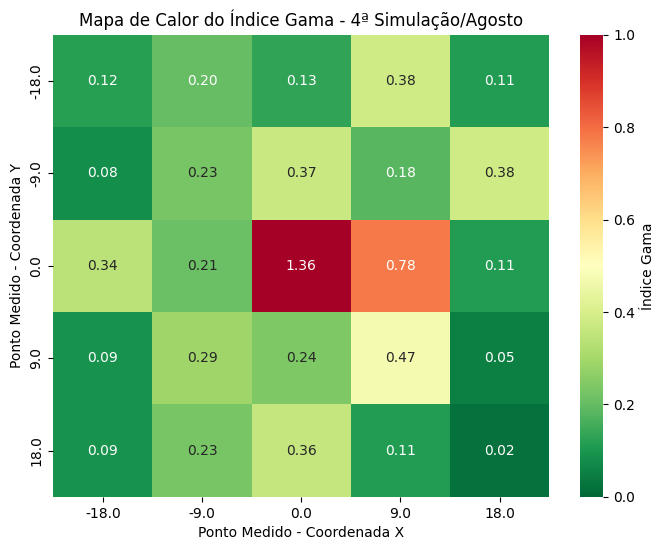

In [1269]:
# Redimensiona o mapa de calor
plt.figure(figsize=(8, 6))

# Cria o mapa de calor usando Seaborn
heatmap = sns.heatmap(df_heatmapDataAugust_sim_4.pivot_table(index='y', columns='x', values='Índice Gama'), cmap='RdYlGn_r', annot=True, fmt=".2f", cbar_kws={'label': 'Índice Gama'}, vmin=0, vmax=1)

# Define rótulos dos eixos
plt.xlabel('Ponto Medido - Coordenada X')
plt.ylabel('Ponto Medido - Coordenada Y')
plt.title('Mapa de Calor do Índice Gama - 4ª Simulação/Agosto')

# Salva o gráfico em um arquivo de imagem (por exemplo, PNG)
plt.savefig(f'heatmapAugust_sim_4_DTA_{delta_dM}.png')

# Plota o mapa de calor
plt.show()

### Resultados - 5ª Simulação

#### Leitura dos dados

* Lê os dados do arquivo .csv com os dados do mês de Agosto.

In [1270]:
# Leitura dos dados do mês de Agosto refente à 1ª Simulação e criação do Dataframe
august_data_sim_5 = './Agosto_22/Matrizes das Simulações para o Programa - Simulação 5 - Agosto.csv'
df_augustData_sim_5 = pd.read_csv(august_data_sim_5)

# Informações do Dataframe dos dados
print(df_augustData_sim_5.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1225 entries, 0 to 1224
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   TLD                       25 non-null     float64
 1   Dose Medida (Dm)          1225 non-null   int64  
 2   Dose Calculada (Dc)       1225 non-null   int64  
 3   Ponto Medido X (rm_x)     1225 non-null   int64  
 4   Ponto Medido Y (rm_y)     1225 non-null   int64  
 5   Ponto Calculado X (rc_x)  1225 non-null   int64  
 6   Ponto Calculado Y (rc_y)  1225 non-null   int64  
dtypes: float64(1), int64(6)
memory usage: 67.1 KB
None


#### Valores de Gamma-Index

* Analisa os 49 pontos calculados para cada ponto medido calculando o gamma-index para cada um desses pontos,
* Retorna o menor gamma-index dos calculados para cada ponto medido, com seu respectivo ponto medido.

In [1271]:
# Obtém o valor máximo dentre as doses medidas
max_Dm = df_augustData_sim_5['Dose Medida (Dm)'].max()

# Criação do dicionário que irá salvar os valores gamma-index para cada ponto
gamma_index_aug_5 = {}

In [1272]:
# Calcula os valores de gamma-index de cada ponto e salva no dicionário os menores valores
for i in range(0, len(df_augustData_sim_5), 49):
    group_df = df_augustData_sim_5.iloc[i:i+49]  # Selecionar grupo de 49 pontos
    min_gamma = group_df.apply(lambda row: position_module(row, max_Dm), axis=1).min()
       
    # Salva o menor valor de gamma-index no dicionário
    x_coord = group_df.iloc[0]['Ponto Medido X (rm_x)']
    y_coord = group_df.iloc[0]['Ponto Medido Y (rm_y)']
    gamma_index_aug_5['{},{}'.format(x_coord, y_coord)] = min_gamma.round(2)

#### Análise dos valores obtidos

* Retorna quais valores estão 'acima' e 'abaixo ou igual' a 1, classificando-os como 'pontos reprovados' e 'pontos aprovados', respectivamente,
* Também cria um dataframe dos pontos analisados com seus respectivos gamma-index.

In [1273]:
# Contar a quantidade de valores menores ou iguais a 1 e a quantidade de valores maiores que 1
menores_ou_iguais_que_um = sum(1 for valor in gamma_index_aug_5.values() if valor <= 1)

maiores_que_um = sum(1 for valor in gamma_index_aug_5.values() if valor > 1)

# Total de valores do gamma-index
total_valores = len(gamma_index_aug_5)

# Calcular as porcentagens dos valores acima
porcentagem_menores_que_um = (menores_ou_iguais_que_um / total_valores) * 100

porcentagem_maiores_que_um = (maiores_que_um / total_valores) * 100

In [1274]:
# Imprimir os resultados
print("Valores referentes às medidas da 5ª Simulação de Agosto")
print()
print("Total de pontos analisados:", total_valores)
print(f"Diferença de percentual de dose: {delta_Dm*100}%")
print(f"DTA utilizado: {delta_dM} mm")
print()
print("Quantidade de valores aprovados, ou seja, menores ou iguais a um:", menores_ou_iguais_que_um)
print("Quantidade de valores reprovados, ou seja, maiores que um:", maiores_que_um)
print()
print(f"Porcentagem de valores aprovados: {porcentagem_menores_que_um}%")
print(f"Porcentagem de valores reprovados: {porcentagem_maiores_que_um}%")

Valores referentes às medidas da 5ª Simulação de Agosto

Total de pontos analisados: 25
Diferença de percentual de dose: 2.0%
DTA utilizado: 2.0 mm

Quantidade de valores aprovados, ou seja, menores ou iguais a um: 25
Quantidade de valores reprovados, ou seja, maiores que um: 0

Porcentagem de valores aprovados: 100.0%
Porcentagem de valores reprovados: 0.0%


#### Visualização dos dados tratados

* Visualiza tabela final para cada simulação, com os pontos medido e seu menor valor de gamma-index calculado.

In [1275]:
# Cria um dataframe para os valores obtidos da primeira simulação
df_augustGammaIndex_sim_5 = pd.DataFrame(list(gamma_index_aug_5.items()), columns=['Pontos Medidos (X,Y)', 'Índice Gama'])

In [1276]:
# Visualiza o DataFrame com os devidos tratamentos
print(df_augustGammaIndex_sim_5.head(25))

   Pontos Medidos (X,Y)  Índice Gama
0             18.0,18.0         0.08
1              9.0,18.0         0.38
2              0.0,18.0         0.26
3             -9.0,18.0         0.44
4            -18.0,18.0         0.19
5              18.0,9.0         0.38
6               9.0,9.0         0.57
7               0.0,9.0         0.17
8              -9.0,9.0         0.55
9             -18.0,9.0         0.27
10             18.0,0.0         0.11
11              9.0,0.0         0.12
12              0.0,0.0         0.86
13             -9.0,0.0         0.42
14            -18.0,0.0         0.07
15            18.0,-9.0         0.07
16             9.0,-9.0         0.17
17             0.0,-9.0         0.37
18            -9.0,-9.0         0.06
19           -18.0,-9.0         0.16
20           18.0,-18.0         0.18
21            9.0,-18.0         0.19
22            0.0,-18.0         0.35
23           -9.0,-18.0         0.07
24          -18.0,-18.0         0.14


#### Mapas de Calor dos dados tratados

* Visualização dos mapas de calor dos dados finais, onde é possível relacionar o gamma-index retornado por cada ponto com sua coordenada (x, y).
* As cores mais 'frias', ilustradas por tons da cor verde, indicam que o valor do gamma-index é menor, ou seja, mais próximo de zero. Enquanto que as cores mais 'quentes', ilustrada por tons de vermelho, indicam que o valor do gamma-index é mais próximo (ou maior que) de um.

In [1277]:
# Extrai as coordenadas x, y e valores do Gamma Index
x_coords, y_coords = zip(*[map(float, coord.split(',')) for coord in df_augustGammaIndex_sim_5['Pontos Medidos (X,Y)']])
gamma_index_values = df_augustGammaIndex_sim_5['Índice Gama']

# Cria um DataFrame para os dados
df_heatmapDataAugust_sim_5 = pd.DataFrame({'x': x_coords, 'y': y_coords, 'Índice Gama': gamma_index_values})

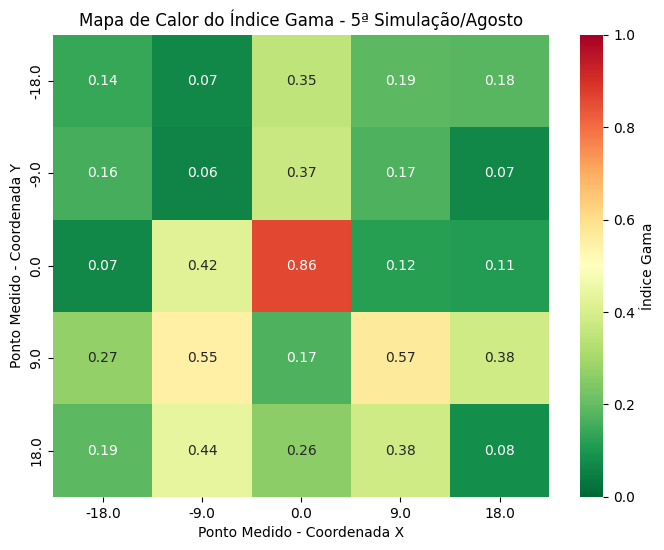

In [1278]:
# Redimensiona o mapa de calor
plt.figure(figsize=(8, 6))

# Cria o mapa de calor usando Seaborn
heatmap = sns.heatmap(df_heatmapDataAugust_sim_5.pivot_table(index='y', columns='x', values='Índice Gama'), cmap='RdYlGn_r', annot=True, fmt=".2f", cbar_kws={'label': 'Índice Gama'}, vmin=0, vmax=1)

# Define rótulos dos eixos
plt.xlabel('Ponto Medido - Coordenada X')
plt.ylabel('Ponto Medido - Coordenada Y')
plt.title('Mapa de Calor do Índice Gama - 5ª Simulação/Agosto')

# Salva o gráfico em um arquivo de imagem (por exemplo, PNG)
plt.savefig(f'heatmapAugust_sim_5_DTA_{delta_dM}.png')

# Plota o mapa de calor
plt.show()

### Resultados - 6ª Simulação

#### Leitura dos dados

* Lê os dados do arquivo .csv com os dados do mês de Agosto.

In [1279]:
# Leitura dos dados do mês de Agosto refente à 1ª Simulação e criação do Dataframe
august_data_sim_6 = './Agosto_22/Matrizes das Simulações para o Programa - Simulação 6 - Agosto.csv'
df_augustData_sim_6 = pd.read_csv(august_data_sim_6)

# Informações do Dataframe dos dados
print(df_augustData_sim_6.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1225 entries, 0 to 1224
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   TLD                       25 non-null     float64
 1   Dose Medida (Dm)          1225 non-null   int64  
 2   Dose Calculada (Dc)       1225 non-null   int64  
 3   Ponto Medido X (rm_x)     1225 non-null   int64  
 4   Ponto Medido Y (rm_y)     1225 non-null   int64  
 5   Ponto Calculado X (rc_x)  1225 non-null   int64  
 6   Ponto Calculado Y (rc_y)  1225 non-null   int64  
dtypes: float64(1), int64(6)
memory usage: 67.1 KB
None


#### Valores de Gamma-Index

* Analisa os 49 pontos calculados para cada ponto medido calculando o gamma-index para cada um desses pontos,
* Retorna o menor gamma-index dos calculados para cada ponto medido, com seu respectivo ponto medido.

In [1280]:
# Obtém o valor máximo dentre as doses medidas
max_Dm = df_augustData_sim_6['Dose Medida (Dm)'].max()

# Criação do dicionário que irá salvar os valores gamma-index para cada ponto
gamma_index_aug_6 = {}

In [1281]:
# Calcula os valores de gamma-index de cada ponto e salva no dicionário os menores valores
for i in range(0, len(df_augustData_sim_6), 49):
    group_df = df_augustData_sim_6.iloc[i:i+49]  # Selecionar grupo de 49 pontos
    min_gamma = group_df.apply(lambda row: position_module(row, max_Dm), axis=1).min()
       
    # Salva o menor valor de gamma-index no dicionário
    x_coord = group_df.iloc[0]['Ponto Medido X (rm_x)']
    y_coord = group_df.iloc[0]['Ponto Medido Y (rm_y)']
    gamma_index_aug_6['{},{}'.format(x_coord, y_coord)] = min_gamma.round(2)

#### Análise dos valores obtidos

* Retorna quais valores estão 'acima' e 'abaixo ou igual' a 1, classificando-os como 'pontos reprovados' e 'pontos aprovados', respectivamente,
* Também cria um dataframe dos pontos analisados com seus respectivos gamma-index.

In [1282]:
# Contar a quantidade de valores menores ou iguais a 1 e a quantidade de valores maiores que 1
menores_ou_iguais_que_um = sum(1 for valor in gamma_index_aug_6.values() if valor <= 1)

maiores_que_um = sum(1 for valor in gamma_index_aug_6.values() if valor > 1)

# Total de valores do gamma-index
total_valores = len(gamma_index_aug_6)

# Calcular as porcentagens dos valores acima
porcentagem_menores_que_um = (menores_ou_iguais_que_um / total_valores) * 100

porcentagem_maiores_que_um = (maiores_que_um / total_valores) * 100

In [1283]:
# Imprimir os resultados
print("Valores referentes às medidas da 6ª Simulação de Agosto")
print()
print("Total de pontos analisados:", total_valores)
print(f"Diferença de percentual de dose: {delta_Dm*100}%")
print(f"DTA utilizado: {delta_dM} mm")
print()
print("Quantidade de valores aprovados, ou seja, menores ou iguais a um:", menores_ou_iguais_que_um)
print("Quantidade de valores reprovados, ou seja, maiores que um:", maiores_que_um)
print()
print(f"Porcentagem de valores aprovados: {porcentagem_menores_que_um}%")
print(f"Porcentagem de valores reprovados: {porcentagem_maiores_que_um}%")

Valores referentes às medidas da 6ª Simulação de Agosto

Total de pontos analisados: 25
Diferença de percentual de dose: 2.0%
DTA utilizado: 2.0 mm

Quantidade de valores aprovados, ou seja, menores ou iguais a um: 25
Quantidade de valores reprovados, ou seja, maiores que um: 0

Porcentagem de valores aprovados: 100.0%
Porcentagem de valores reprovados: 0.0%


#### Visualização dos dados tratados

* Visualiza tabela final para cada simulação, com os pontos medido e seu menor valor de gamma-index calculado.

In [1284]:
# Cria um dataframe para os valores obtidos da primeira simulação
df_augustGammaIndex_sim_6 = pd.DataFrame(list(gamma_index_aug_6.items()), columns=['Pontos Medidos (X,Y)', 'Índice Gama'])

In [1285]:
# Visualiza o DataFrame com os devidos tratamentos
print(df_augustGammaIndex_sim_6.head(25))

   Pontos Medidos (X,Y)  Índice Gama
0             18.0,18.0         0.15
1              9.0,18.0         0.38
2              0.0,18.0         0.47
3             -9.0,18.0         0.42
4            -18.0,18.0         0.16
5              18.0,9.0         0.20
6               9.0,9.0         0.55
7               0.0,9.0         0.02
8              -9.0,9.0         0.74
9             -18.0,9.0         0.12
10             18.0,0.0         0.48
11              9.0,0.0         0.90
12              0.0,0.0         0.63
13             -9.0,0.0         0.41
14            -18.0,0.0         0.59
15            18.0,-9.0         0.21
16             9.0,-9.0         0.14
17             0.0,-9.0         0.22
18            -9.0,-9.0         0.25
19           -18.0,-9.0         0.12
20           18.0,-18.0         0.19
21            9.0,-18.0         0.23
22            0.0,-18.0         0.24
23           -9.0,-18.0         0.40
24          -18.0,-18.0         0.08


#### Mapas de Calor dos dados tratados

* Visualização dos mapas de calor dos dados finais, onde é possível relacionar o gamma-index retornado por cada ponto com sua coordenada (x, y).
* As cores mais 'frias', ilustradas por tons da cor verde, indicam que o valor do gamma-index é menor, ou seja, mais próximo de zero. Enquanto que as cores mais 'quentes', ilustrada por tons de vermelho, indicam que o valor do gamma-index é mais próximo (ou maior que) de um.

In [1286]:
# Extrai as coordenadas x, y e valores do Gamma Index
x_coords, y_coords = zip(*[map(float, coord.split(',')) for coord in df_augustGammaIndex_sim_6['Pontos Medidos (X,Y)']])
gamma_index_values = df_augustGammaIndex_sim_6['Índice Gama']

# Cria um DataFrame para os dados
df_heatmapDataAugust_sim_6 = pd.DataFrame({'x': x_coords, 'y': y_coords, 'Índice Gama': gamma_index_values})

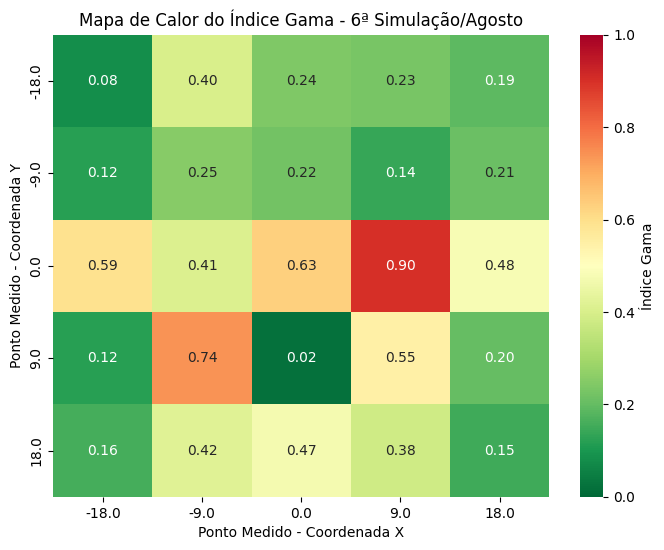

In [1287]:
# Redimensiona o mapa de calor
plt.figure(figsize=(8, 6))

# Cria o mapa de calor usando Seaborn
heatmap = sns.heatmap(df_heatmapDataAugust_sim_6.pivot_table(index='y', columns='x', values='Índice Gama'), cmap='RdYlGn_r', annot=True, fmt=".2f", cbar_kws={'label': 'Índice Gama'}, vmin=0, vmax=1)

# Define rótulos dos eixos
plt.xlabel('Ponto Medido - Coordenada X')
plt.ylabel('Ponto Medido - Coordenada Y')
plt.title('Mapa de Calor do Índice Gama - 6ª Simulação/Agosto')

# Salva o gráfico em um arquivo de imagem (por exemplo, PNG)
plt.savefig(f'heatmapAugust_sim_6_DTA_{delta_dM}.png')

# Plota o mapa de calor
plt.show()

### Resultados - 7ª Simulação

#### Leitura dos dados

* Lê os dados do arquivo .csv com os dados do mês de Agosto.

In [1288]:
# Leitura dos dados do mês de Agosto refente à 1ª Simulação e criação do Dataframe
august_data_sim_7 = './Agosto_22/Matrizes das Simulações para o Programa - Simulação 7 - Agosto.csv'
df_augustData_sim_7 = pd.read_csv(august_data_sim_7)

# Informações do Dataframe dos dados
print(df_augustData_sim_7.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1225 entries, 0 to 1224
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   TLD                       25 non-null     float64
 1   Dose Medida (Dm)          1225 non-null   int64  
 2   Dose Calculada (Dc)       1225 non-null   int64  
 3   Ponto Medido X (rm_x)     1225 non-null   int64  
 4   Ponto Medido Y (rm_y)     1225 non-null   int64  
 5   Ponto Calculado X (rc_x)  1225 non-null   int64  
 6   Ponto Calculado Y (rc_y)  1225 non-null   int64  
dtypes: float64(1), int64(6)
memory usage: 67.1 KB
None


#### Valores de Gamma-Index

* Analisa os 49 pontos calculados para cada ponto medido calculando o gamma-index para cada um desses pontos,
* Retorna o menor gamma-index dos calculados para cada ponto medido, com seu respectivo ponto medido.

In [1289]:
# Obtém o valor máximo dentre as doses medidas
max_Dm = df_augustData_sim_7['Dose Medida (Dm)'].max()

# Criação do dicionário que irá salvar os valores gamma-index para cada ponto
gamma_index_aug_7 = {}

In [1290]:
# Calcula os valores de gamma-index de cada ponto e salva no dicionário os menores valores
for i in range(0, len(df_augustData_sim_7), 49):
    group_df = df_augustData_sim_7.iloc[i:i+49]  # Selecionar grupo de 49 pontos
    min_gamma = group_df.apply(lambda row: position_module(row, max_Dm), axis=1).min()
       
    # Salva o menor valor de gamma-index no dicionário
    x_coord = group_df.iloc[0]['Ponto Medido X (rm_x)']
    y_coord = group_df.iloc[0]['Ponto Medido Y (rm_y)']
    gamma_index_aug_7['{},{}'.format(x_coord, y_coord)] = min_gamma.round(2)

#### Análise dos valores obtidos

* Retorna quais valores estão 'acima' e 'abaixo ou igual' a 1, classificando-os como 'pontos reprovados' e 'pontos aprovados', respectivamente,
* Também cria um dataframe dos pontos analisados com seus respectivos gamma-index.

In [1291]:
# Contar a quantidade de valores menores ou iguais a 1 e a quantidade de valores maiores que 1
menores_ou_iguais_que_um = sum(1 for valor in gamma_index_aug_7.values() if valor <= 1)

maiores_que_um = sum(1 for valor in gamma_index_aug_7.values() if valor > 1)

# Total de valores do gamma-index
total_valores = len(gamma_index_aug_7)

# Calcular as porcentagens dos valores acima
porcentagem_menores_que_um = (menores_ou_iguais_que_um / total_valores) * 100

porcentagem_maiores_que_um = (maiores_que_um / total_valores) * 100

In [1292]:
# Imprimir os resultados
print("Valores referentes às medidas da 7ª Simulação de Agosto")
print()
print("Total de pontos analisados:", total_valores)
print(f"Diferença de percentual de dose: {delta_Dm*100}%")
print(f"DTA utilizado: {delta_dM} mm")
print()
print("Quantidade de valores aprovados, ou seja, menores ou iguais a um:", menores_ou_iguais_que_um)
print("Quantidade de valores reprovados, ou seja, maiores que um:", maiores_que_um)
print()
print(f"Porcentagem de valores aprovados: {porcentagem_menores_que_um}%")
print(f"Porcentagem de valores reprovados: {porcentagem_maiores_que_um}%")

Valores referentes às medidas da 7ª Simulação de Agosto

Total de pontos analisados: 25
Diferença de percentual de dose: 2.0%
DTA utilizado: 2.0 mm

Quantidade de valores aprovados, ou seja, menores ou iguais a um: 25
Quantidade de valores reprovados, ou seja, maiores que um: 0

Porcentagem de valores aprovados: 100.0%
Porcentagem de valores reprovados: 0.0%


#### Visualização dos dados tratados

* Visualiza tabela final para cada simulação, com os pontos medido e seu menor valor de gamma-index calculado.

In [1293]:
# Cria um dataframe para os valores obtidos da primeira simulação
df_augustGammaIndex_sim_7 = pd.DataFrame(list(gamma_index_aug_7.items()), columns=['Pontos Medidos (X,Y)', 'Índice Gama'])

In [1294]:
# Visualiza o DataFrame com os devidos tratamentos
print(df_augustGammaIndex_sim_7.head(25))

   Pontos Medidos (X,Y)  Índice Gama
0             18.0,18.0         0.08
1              9.0,18.0         0.43
2              0.0,18.0         0.71
3             -9.0,18.0         0.38
4            -18.0,18.0         0.19
5              18.0,9.0         0.36
6               9.0,9.0         0.09
7               0.0,9.0         0.40
8              -9.0,9.0         0.53
9             -18.0,9.0         0.10
10             18.0,0.0         0.79
11              9.0,0.0         0.38
12              0.0,0.0         0.56
13             -9.0,0.0         0.58
14            -18.0,0.0         0.54
15            18.0,-9.0         0.20
16             9.0,-9.0         0.59
17             0.0,-9.0         0.52
18            -9.0,-9.0         0.19
19           -18.0,-9.0         0.10
20           18.0,-18.0         0.09
21            9.0,-18.0         0.06
22            0.0,-18.0         0.75
23           -9.0,-18.0         0.06
24          -18.0,-18.0         0.18


#### Mapas de Calor dos dados tratados

* Visualização dos mapas de calor dos dados finais, onde é possível relacionar o gamma-index retornado por cada ponto com sua coordenada (x, y).
* As cores mais 'frias', ilustradas por tons da cor verde, indicam que o valor do gamma-index é menor, ou seja, mais próximo de zero. Enquanto que as cores mais 'quentes', ilustrada por tons de vermelho, indicam que o valor do gamma-index é mais próximo (ou maior que) de um.

In [1295]:
# Extrai as coordenadas x, y e valores do Gamma Index
x_coords, y_coords = zip(*[map(float, coord.split(',')) for coord in df_augustGammaIndex_sim_7['Pontos Medidos (X,Y)']])
gamma_index_values = df_augustGammaIndex_sim_7['Índice Gama']

# Cria um DataFrame para os dados
df_heatmapDataAugust_sim_7 = pd.DataFrame({'x': x_coords, 'y': y_coords, 'Índice Gama': gamma_index_values})

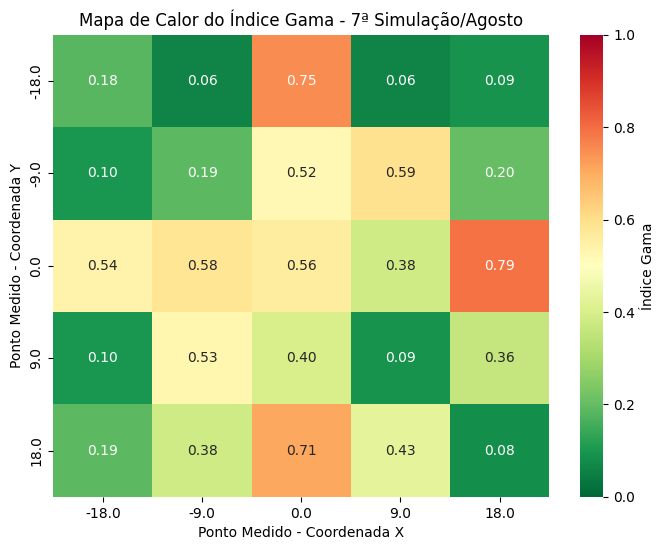

In [1296]:
# Redimensiona o mapa de calor
plt.figure(figsize=(8, 6))

# Cria o mapa de calor usando Seaborn
heatmap = sns.heatmap(df_heatmapDataAugust_sim_7.pivot_table(index='y', columns='x', values='Índice Gama'), cmap='RdYlGn_r', annot=True, fmt=".2f", cbar_kws={'label': 'Índice Gama'}, vmin=0, vmax=1)

# Define rótulos dos eixos
plt.xlabel('Ponto Medido - Coordenada X')
plt.ylabel('Ponto Medido - Coordenada Y')
plt.title('Mapa de Calor do Índice Gama - 7ª Simulação/Agosto')

# Salva o gráfico em um arquivo de imagem (por exemplo, PNG)
plt.savefig(f'heatmapAugust_sim_7_DTA_{delta_dM}.png')

# Plota o mapa de calor
plt.show()

## *Medidas de Fevereiro/2023*

* Abaixo se encontra a análise dos 25 medidos realizadas em fevereiro/2023, onde foram calculados os valores de gamma-index dos 49 pontos calculados sobre e na vizinhança de cada ponto medido,
* Também foi feita a análise dos resultados a partir dos valores de menor gamma-index destes valores.

### Resultados - 1ª Simulação

#### Leitura dos dados

* Lê os dados do arquivo .csv com os dados do mês de Agosto.

In [1297]:
# Leitura dos dados do mês de Agosto refente à 1ª Simulação e criação do Dataframe
february_data_sim_1 = './Fevereiro_23/Matrizes das Simulações para o Programa - Simulação 1 - Fevereiro.csv'
df_februaryData_sim_1 = pd.read_csv(february_data_sim_1)

# Informações do Dataframe dos dados
print(df_februaryData_sim_1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1225 entries, 0 to 1224
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   TLD                       25 non-null     float64
 1   Dose Medida (Dm)          1225 non-null   int64  
 2   Dose Calculada (Dc)       1225 non-null   int64  
 3   Ponto Medido X (rm_x)     1225 non-null   int64  
 4   Ponto Medido Y (rm_y)     1225 non-null   int64  
 5   Ponto Calculado X (rc_x)  1225 non-null   int64  
 6   Ponto Calculado Y (rc_y)  1225 non-null   int64  
dtypes: float64(1), int64(6)
memory usage: 67.1 KB
None


#### Valores de Gamma-Index

* Analisa os 49 pontos calculados para cada ponto medido calculando o gamma-index para cada um desses pontos,
* Retorna o menor gamma-index dos calculados para cada ponto medido, com seu respectivo ponto medido.

In [1298]:
# Obtém o valor máximo dentre as doses medidas
max_Dm = df_februaryData_sim_1['Dose Medida (Dm)'].max()

# Criação do dicionário que irá salvar os valores gamma-index para cada ponto
gamma_index_feb_1 = {}

In [1299]:
# Calcula os valores de gamma-index de cada ponto e salva no dicionário os menores valores
for i in range(0, len(df_februaryData_sim_1), 49):
    group_df = df_februaryData_sim_1.iloc[i:i+49]  # Selecionar grupo de 49 pontos
    min_gamma = group_df.apply(lambda row: position_module(row, max_Dm), axis=1).min()
       
    # Salva o menor valor de gamma-index no dicionário
    x_coord = group_df.iloc[0]['Ponto Medido X (rm_x)']
    y_coord = group_df.iloc[0]['Ponto Medido Y (rm_y)']
    gamma_index_feb_1['{},{}'.format(x_coord, y_coord)] = min_gamma.round(2)

#### Análise dos valores obtidos

* Retorna quais valores estão 'acima' e 'abaixo ou igual' a 1, classificando-os como 'pontos reprovados' e 'pontos aprovados', respectivamente,
* Também cria um dataframe dos pontos analisados com seus respectivos gamma-index.

In [1300]:
# Contar a quantidade de valores menores ou iguais a 1 e a quantidade de valores maiores que 1
menores_ou_iguais_que_um = sum(1 for valor in gamma_index_feb_1.values() if valor <= 1)

maiores_que_um = sum(1 for valor in gamma_index_feb_1.values() if valor > 1)

# Total de valores do gamma-index
total_valores = len(gamma_index_feb_1)

# Calcular as porcentagens dos valores acima
porcentagem_menores_que_um = (menores_ou_iguais_que_um / total_valores) * 100

porcentagem_maiores_que_um = (maiores_que_um / total_valores) * 100

In [1301]:
# Imprimir os resultados
print("Valores referentes às medidas da 1ª Simulação de Fevereiro")
print()
print("Total de pontos analisados:", total_valores)
print(f"Diferença de percentual de dose: {delta_Dm*100}%")
print(f"DTA utilizado: {delta_dM} mm")
print()
print("Quantidade de valores aprovados, ou seja, menores ou iguais a um:", menores_ou_iguais_que_um)
print("Quantidade de valores reprovados, ou seja, maiores que um:", maiores_que_um)
print()
print(f"Porcentagem de valores aprovados: {porcentagem_menores_que_um}%")
print(f"Porcentagem de valores reprovados: {porcentagem_maiores_que_um}%")

Valores referentes às medidas da 1ª Simulação de Fevereiro

Total de pontos analisados: 25
Diferença de percentual de dose: 2.0%
DTA utilizado: 2.0 mm

Quantidade de valores aprovados, ou seja, menores ou iguais a um: 25
Quantidade de valores reprovados, ou seja, maiores que um: 0

Porcentagem de valores aprovados: 100.0%
Porcentagem de valores reprovados: 0.0%


#### Visualização dos dados tratados

* Visualiza tabela final para cada simulação, com os pontos medido e seu menor valor de gamma-index calculado.

In [1302]:
# Cria um dataframe para os valores obtidos da primeira simulação
df_februaryGammaIndex_sim_1 = pd.DataFrame(list(gamma_index_feb_1.items()), columns=['Pontos Medidos (X,Y)', 'Índice Gama'])

In [1303]:
# Visualiza o DataFrame com os devidos tratamentos
print(df_februaryGammaIndex_sim_1.head(25))

   Pontos Medidos (X,Y)  Índice Gama
0             18.0,18.0         0.23
1              9.0,18.0         0.11
2              0.0,18.0         0.41
3             -9.0,18.0         0.30
4            -18.0,18.0         0.16
5              18.0,9.0         0.24
6               9.0,9.0         0.40
7               0.0,9.0         0.19
8              -9.0,9.0         0.76
9             -18.0,9.0         0.06
10             18.0,0.0         0.32
11              9.0,0.0         0.81
12              0.0,0.0         0.27
13             -9.0,0.0         0.22
14            -18.0,0.0         0.74
15            18.0,-9.0         0.23
16             9.0,-9.0         0.70
17             0.0,-9.0         0.20
18            -9.0,-9.0         0.79
19           -18.0,-9.0         0.06
20           18.0,-18.0         0.12
21            9.0,-18.0         0.31
22            0.0,-18.0         0.30
23           -9.0,-18.0         0.55
24          -18.0,-18.0         0.19


#### Mapas de Calor dos dados tratados

* Visualização dos mapas de calor dos dados finais, onde é possível relacionar o gamma-index retornado por cada ponto com sua coordenada (x, y).
* As cores mais 'frias', ilustradas por tons da cor verde, indicam que o valor do gamma-index é menor, ou seja, mais próximo de zero. Enquanto que as cores mais 'quentes', ilustrada por tons de vermelho, indicam que o valor do gamma-index é mais próximo (ou maior que) de um.

In [1304]:
# Extrai as coordenadas x, y e valores do Gamma Index
x_coords, y_coords = zip(*[map(float, coord.split(',')) for coord in df_februaryGammaIndex_sim_1['Pontos Medidos (X,Y)']])
gamma_index_values = df_februaryGammaIndex_sim_1['Índice Gama']

# Cria um DataFrame para os dados
df_heatmapDataFebruary_sim_1 = pd.DataFrame({'x': x_coords, 'y': y_coords, 'Índice Gama': gamma_index_values})

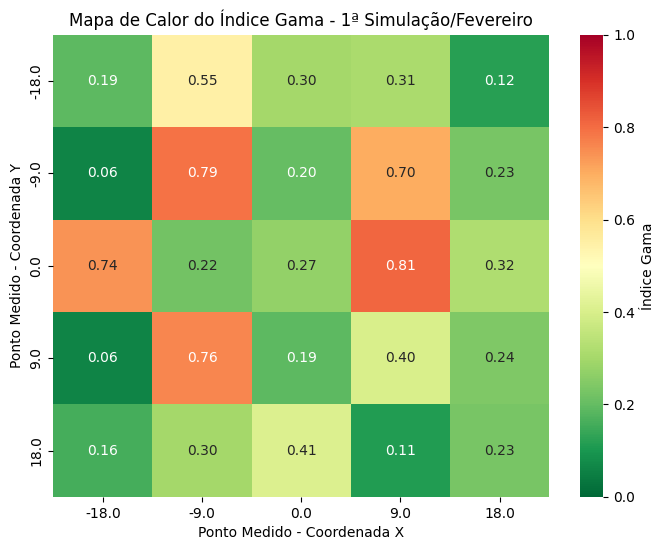

In [1305]:
# Redimensiona o mapa de calor
plt.figure(figsize=(8, 6))

# Cria o mapa de calor usando Seaborn
heatmap = sns.heatmap(df_heatmapDataFebruary_sim_1.pivot_table(index='y', columns='x', values='Índice Gama'), cmap='RdYlGn_r', annot=True, fmt=".2f", cbar_kws={'label': 'Índice Gama'}, vmin=0, vmax=1)

# Define rótulos dos eixos
plt.xlabel('Ponto Medido - Coordenada X')
plt.ylabel('Ponto Medido - Coordenada Y')
plt.title('Mapa de Calor do Índice Gama - 1ª Simulação/Fevereiro')

# Salva o gráfico em um arquivo de imagem (por exemplo, PNG)
plt.savefig(f'heatmapFebruary_sim_1_DTA_{delta_dM}.png')

# Plota o mapa de calor
plt.show()

### Resultados - 2ª Simulação

#### Leitura dos dados

* Lê os dados do arquivo .csv com os dados do mês de Agosto.

In [1306]:
# Leitura dos dados do mês de Agosto refente à 1ª Simulação e criação do Dataframe
february_data_sim_2 = './Fevereiro_23/Matrizes das Simulações para o Programa - Simulação 2 - Fevereiro.csv'
df_februaryData_sim_2 = pd.read_csv(february_data_sim_2)

# Informações do Dataframe dos dados
print(df_februaryData_sim_2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1225 entries, 0 to 1224
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   TLD                       25 non-null     float64
 1   Dose Medida (Dm)          1225 non-null   int64  
 2   Dose Calculada (Dc)       1225 non-null   int64  
 3   Ponto Medido X (rm_x)     1225 non-null   int64  
 4   Ponto Medido Y (rm_y)     1225 non-null   int64  
 5   Ponto Calculado X (rc_x)  1225 non-null   int64  
 6   Ponto Calculado Y (rc_y)  1225 non-null   int64  
 7   Unnamed: 7                0 non-null      float64
 8   Unnamed: 8                1 non-null      object 
 9   Unnamed: 9                1 non-null      object 
dtypes: float64(2), int64(6), object(2)
memory usage: 95.8+ KB
None


#### Valores de Gamma-Index

* Analisa os 49 pontos calculados para cada ponto medido calculando o gamma-index para cada um desses pontos,
* Retorna o menor gamma-index dos calculados para cada ponto medido, com seu respectivo ponto medido.

In [1307]:
# Obtém o valor máximo dentre as doses medidas
max_Dm = df_februaryData_sim_2['Dose Medida (Dm)'].max()

# Criação do dicionário que irá salvar os valores gamma-index para cada ponto
gamma_index_feb_2 = {}

In [1308]:
# Calcula os valores de gamma-index de cada ponto e salva no dicionário os menores valores
for i in range(0, len(df_februaryData_sim_2), 49):
    group_df = df_februaryData_sim_2.iloc[i:i+49]  # Selecionar grupo de 49 pontos
    min_gamma = group_df.apply(lambda row: position_module(row, max_Dm), axis=1).min()
       
    # Salva o menor valor de gamma-index no dicionário
    x_coord = group_df.iloc[0]['Ponto Medido X (rm_x)']
    y_coord = group_df.iloc[0]['Ponto Medido Y (rm_y)']
    gamma_index_feb_2['{},{}'.format(x_coord, y_coord)] = min_gamma.round(2)

#### Análise dos valores obtidos

* Retorna quais valores estão 'acima' e 'abaixo ou igual' a 1, classificando-os como 'pontos reprovados' e 'pontos aprovados', respectivamente,
* Também cria um dataframe dos pontos analisados com seus respectivos gamma-index.

In [1309]:
# Contar a quantidade de valores menores ou iguais a 1 e a quantidade de valores maiores que 1
menores_ou_iguais_que_um = sum(1 for valor in gamma_index_feb_2.values() if valor <= 1)

maiores_que_um = sum(1 for valor in gamma_index_feb_2.values() if valor > 1)

# Total de valores do gamma-index
total_valores = len(gamma_index_feb_2)

# Calcular as porcentagens dos valores acima
porcentagem_menores_que_um = (menores_ou_iguais_que_um / total_valores) * 100

porcentagem_maiores_que_um = (maiores_que_um / total_valores) * 100

In [1310]:
# Imprimir os resultados
print("Valores referentes às medidas da 2ª Simulação de Fevereiro")
print()
print("Total de pontos analisados:", total_valores)
print(f"Diferença de percentual de dose: {delta_Dm*100}%")
print(f"DTA utilizado: {delta_dM} mm")
print()
print("Quantidade de valores aprovados, ou seja, menores ou iguais a um:", menores_ou_iguais_que_um)
print("Quantidade de valores reprovados, ou seja, maiores que um:", maiores_que_um)
print()
print(f"Porcentagem de valores aprovados: {porcentagem_menores_que_um}%")
print(f"Porcentagem de valores reprovados: {porcentagem_maiores_que_um}%")

Valores referentes às medidas da 2ª Simulação de Fevereiro

Total de pontos analisados: 25
Diferença de percentual de dose: 2.0%
DTA utilizado: 2.0 mm

Quantidade de valores aprovados, ou seja, menores ou iguais a um: 21
Quantidade de valores reprovados, ou seja, maiores que um: 4

Porcentagem de valores aprovados: 84.0%
Porcentagem de valores reprovados: 16.0%


#### Visualização dos dados tratados

* Visualiza tabela final para cada simulação, com os pontos medido e seu menor valor de gamma-index calculado.

In [1311]:
# Cria um dataframe para os valores obtidos da primeira simulação
df_februaryGammaIndex_sim_2 = pd.DataFrame(list(gamma_index_feb_2.items()), columns=['Pontos Medidos (X,Y)', 'Índice Gama'])

In [1312]:
# Visualiza o DataFrame com os devidos tratamentos
print(df_februaryGammaIndex_sim_2.head(25))

   Pontos Medidos (X,Y)  Índice Gama
0                 18,18         0.08
1                  9,18         0.15
2                  0,18         1.03
3                 -9,18         0.15
4                -18,18         0.09
5                  18,9         0.08
6                   9,9         0.11
7                   0,9         1.16
8                  -9,9         0.08
9                 -18,9         0.11
10                 18,0         0.28
11                  9,0         0.18
12                  0,0         0.95
13                 -9,0         0.36
14                -18,0         0.25
15                18,-9         0.12
16                 9,-9         0.10
17                 0,-9         1.10
18                -9,-9         0.04
19               -18,-9         0.07
20               18,-18         0.04
21                9,-18         0.10
22                0,-18         1.35
23               -9,-18         0.30
24              -18,-18         0.04


#### Mapas de Calor dos dados tratados

* Visualização dos mapas de calor dos dados finais, onde é possível relacionar o gamma-index retornado por cada ponto com sua coordenada (x, y).
* As cores mais 'frias', ilustradas por tons da cor verde, indicam que o valor do gamma-index é menor, ou seja, mais próximo de zero. Enquanto que as cores mais 'quentes', ilustrada por tons de vermelho, indicam que o valor do gamma-index é mais próximo (ou maior que) de um.

In [1313]:
# Extrai as coordenadas x, y e valores do Gamma Index
x_coords, y_coords = zip(*[map(float, coord.split(',')) for coord in df_februaryGammaIndex_sim_2['Pontos Medidos (X,Y)']])
gamma_index_values = df_februaryGammaIndex_sim_2['Índice Gama']

# Cria um DataFrame para os dados
df_heatmapDataFebruary_sim_2 = pd.DataFrame({'x': x_coords, 'y': y_coords, 'Índice Gama': gamma_index_values})

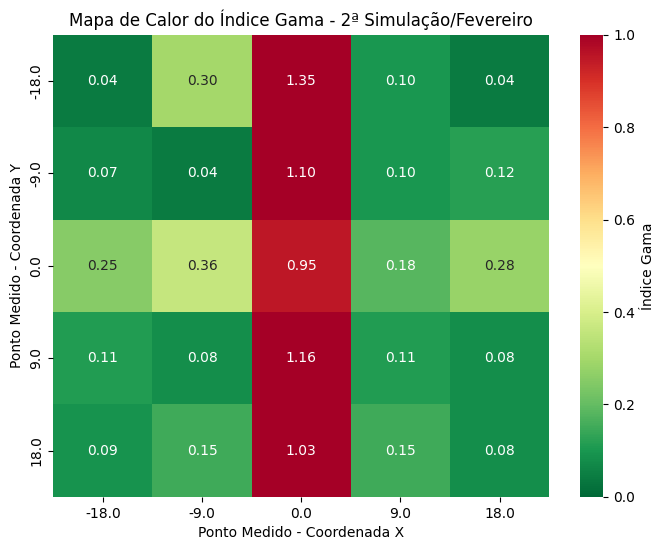

In [1314]:
# Redimensiona o mapa de calor
plt.figure(figsize=(8, 6))

# Cria o mapa de calor usando Seaborn
heatmap = sns.heatmap(df_heatmapDataFebruary_sim_2.pivot_table(index='y', columns='x', values='Índice Gama'), cmap='RdYlGn_r', annot=True, fmt=".2f", cbar_kws={'label': 'Índice Gama'}, vmin=0, vmax=1)

# Define rótulos dos eixos
plt.xlabel('Ponto Medido - Coordenada X')
plt.ylabel('Ponto Medido - Coordenada Y')
plt.title('Mapa de Calor do Índice Gama - 2ª Simulação/Fevereiro')

# Salva o gráfico em um arquivo de imagem (por exemplo, PNG)
plt.savefig(f'heatmapFebruary_sim_2_DTA_{delta_dM}.png')

# Plota o mapa de calor
plt.show()

### Resultados - 3ª Simulação

#### Leitura dos dados

* Lê os dados do arquivo .csv com os dados do mês de Agosto.

In [1315]:
# Leitura dos dados do mês de Agosto refente à 1ª Simulação e criação do Dataframe
february_data_sim_3 = './Fevereiro_23/Matrizes das Simulações para o Programa - Simulação 3 - Fevereiro.csv'
df_februaryData_sim_3 = pd.read_csv(february_data_sim_3)

# Informações do Dataframe dos dados
print(df_februaryData_sim_3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1225 entries, 0 to 1224
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   TLD                       25 non-null     float64
 1   Dose Medida (Dm)          1225 non-null   int64  
 2   Dose Calculada (Dc)       1225 non-null   int64  
 3   Ponto Medido X (rm_x)     1225 non-null   int64  
 4   Ponto Medido Y (rm_y)     1225 non-null   int64  
 5   Ponto Calculado X (rc_x)  1225 non-null   int64  
 6   Ponto Calculado Y (rc_y)  1225 non-null   int64  
dtypes: float64(1), int64(6)
memory usage: 67.1 KB
None


#### Valores de Gamma-Index

* Analisa os 49 pontos calculados para cada ponto medido calculando o gamma-index para cada um desses pontos,
* Retorna o menor gamma-index dos calculados para cada ponto medido, com seu respectivo ponto medido.

In [1316]:
# Obtém o valor máximo dentre as doses medidas
max_Dm = df_februaryData_sim_3['Dose Medida (Dm)'].max()

# Criação do dicionário que irá salvar os valores gamma-index para cada ponto
gamma_index_feb_3 = {}

In [1317]:
# Calcula os valores de gamma-index de cada ponto e salva no dicionário os menores valores
for i in range(0, len(df_februaryData_sim_3), 49):
    group_df = df_februaryData_sim_3.iloc[i:i+49]  # Selecionar grupo de 49 pontos
    min_gamma = group_df.apply(lambda row: position_module(row, max_Dm), axis=1).min()
       
    # Salva o menor valor de gamma-index no dicionário
    x_coord = group_df.iloc[0]['Ponto Medido X (rm_x)']
    y_coord = group_df.iloc[0]['Ponto Medido Y (rm_y)']
    gamma_index_feb_3['{},{}'.format(x_coord, y_coord)] = min_gamma.round(2)

#### Análise dos valores obtidos

* Retorna quais valores estão 'acima' e 'abaixo ou igual' a 1, classificando-os como 'pontos reprovados' e 'pontos aprovados', respectivamente,
* Também cria um dataframe dos pontos analisados com seus respectivos gamma-index.

In [1318]:
# Contar a quantidade de valores menores ou iguais a 1 e a quantidade de valores maiores que 1
menores_ou_iguais_que_um = sum(1 for valor in gamma_index_feb_3.values() if valor <= 1)

maiores_que_um = sum(1 for valor in gamma_index_feb_3.values() if valor > 1)

# Total de valores do gamma-index
total_valores = len(gamma_index_feb_3)

# Calcular as porcentagens dos valores acima
porcentagem_menores_que_um = (menores_ou_iguais_que_um / total_valores) * 100

porcentagem_maiores_que_um = (maiores_que_um / total_valores) * 100

In [1319]:
# Imprimir os resultados
print("Valores referentes às medidas da 3ª Simulação de Fevereiro")
print()
print("Total de pontos analisados:", total_valores)
print(f"Diferença de percentual de dose: {delta_Dm*100}%")
print(f"DTA utilizado: {delta_dM} mm")
print()
print("Quantidade de valores aprovados, ou seja, menores ou iguais a um:", menores_ou_iguais_que_um)
print("Quantidade de valores reprovados, ou seja, maiores que um:", maiores_que_um)
print()
print(f"Porcentagem de valores aprovados: {porcentagem_menores_que_um}%")
print(f"Porcentagem de valores reprovados: {porcentagem_maiores_que_um}%")

Valores referentes às medidas da 3ª Simulação de Fevereiro

Total de pontos analisados: 25
Diferença de percentual de dose: 2.0%
DTA utilizado: 2.0 mm

Quantidade de valores aprovados, ou seja, menores ou iguais a um: 20
Quantidade de valores reprovados, ou seja, maiores que um: 5

Porcentagem de valores aprovados: 80.0%
Porcentagem de valores reprovados: 20.0%


#### Visualização dos dados tratados

* Visualiza tabela final para cada simulação, com os pontos medido e seu menor valor de gamma-index calculado.

In [1320]:
# Cria um dataframe para os valores obtidos da primeira simulação
df_februaryGammaIndex_sim_3 = pd.DataFrame(list(gamma_index_feb_3.items()), columns=['Pontos Medidos (X,Y)', 'Índice Gama'])

In [1321]:
# Visualiza o DataFrame com os devidos tratamentos
print(df_februaryGammaIndex_sim_3.head(25))

   Pontos Medidos (X,Y)  Índice Gama
0             18.0,18.0         0.08
1              9.0,18.0         0.07
2              0.0,18.0         0.38
3             -9.0,18.0         0.07
4            -18.0,18.0         0.05
5              18.0,9.0         0.21
6               9.0,9.0         0.10
7               0.0,9.0         0.26
8              -9.0,9.0         0.03
9             -18.0,9.0         0.24
10             18.0,0.0         1.03
11              9.0,0.0         1.34
12              0.0,0.0         1.26
13             -9.0,0.0         1.33
14            -18.0,0.0         1.21
15            18.0,-9.0         0.36
16             9.0,-9.0         0.14
17             0.0,-9.0         0.10
18            -9.0,-9.0         0.13
19           -18.0,-9.0         0.33
20           18.0,-18.0         0.05
21            9.0,-18.0         0.19
22            0.0,-18.0         0.36
23           -9.0,-18.0         0.24
24          -18.0,-18.0         0.15


#### Mapas de Calor dos dados tratados

* Visualização dos mapas de calor dos dados finais, onde é possível relacionar o gamma-index retornado por cada ponto com sua coordenada (x, y).
* As cores mais 'frias', ilustradas por tons da cor verde, indicam que o valor do gamma-index é menor, ou seja, mais próximo de zero. Enquanto que as cores mais 'quentes', ilustrada por tons de vermelho, indicam que o valor do gamma-index é mais próximo (ou maior que) de um.

In [1322]:
# Extrai as coordenadas x, y e valores do Gamma Index
x_coords, y_coords = zip(*[map(float, coord.split(',')) for coord in df_februaryGammaIndex_sim_3['Pontos Medidos (X,Y)']])
gamma_index_values = df_februaryGammaIndex_sim_3['Índice Gama']

# Cria um DataFrame para os dados
df_heatmapDataFebruary_sim_3 = pd.DataFrame({'x': x_coords, 'y': y_coords, 'Índice Gama': gamma_index_values})

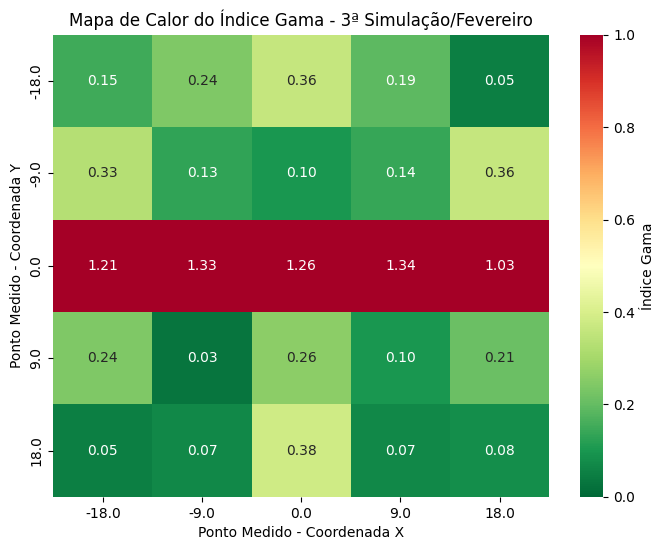

In [1323]:
# Redimensiona o mapa de calor
plt.figure(figsize=(8, 6))

# Cria o mapa de calor usando Seaborn
heatmap = sns.heatmap(df_heatmapDataFebruary_sim_3.pivot_table(index='y', columns='x', values='Índice Gama'), cmap='RdYlGn_r', annot=True, fmt=".2f", cbar_kws={'label': 'Índice Gama'}, vmin=0, vmax=1)

# Define rótulos dos eixos
plt.xlabel('Ponto Medido - Coordenada X')
plt.ylabel('Ponto Medido - Coordenada Y')
plt.title('Mapa de Calor do Índice Gama - 3ª Simulação/Fevereiro')

# Salva o gráfico em um arquivo de imagem (por exemplo, PNG)
plt.savefig(f'heatmapFebruary_sim_3_DTA_{delta_dM}.png')

# Plota o mapa de calor
plt.show()

### Resultados - 4ª Simulação

#### Leitura dos dados

* Lê os dados do arquivo .csv com os dados do mês de Agosto.

In [1324]:
# Leitura dos dados do mês de Agosto refente à 1ª Simulação e criação do Dataframe
february_data_sim_4 = './Fevereiro_23/Matrizes das Simulações para o Programa - Simulação 4 - Fevereiro.csv'
df_februaryData_sim_4 = pd.read_csv(february_data_sim_4)

# Informações do Dataframe dos dados
print(df_februaryData_sim_4.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1225 entries, 0 to 1224
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   TLD                       25 non-null     float64
 1   Dose Medida (Dm)          1225 non-null   int64  
 2   Dose Calculada (Dc)       1225 non-null   int64  
 3   Ponto Medido X (rm_x)     1225 non-null   int64  
 4   Ponto Medido Y (rm_y)     1225 non-null   int64  
 5   Ponto Calculado X (rc_x)  1225 non-null   int64  
 6   Ponto Calculado Y (rc_y)  1225 non-null   int64  
dtypes: float64(1), int64(6)
memory usage: 67.1 KB
None


#### Valores de Gamma-Index

* Analisa os 49 pontos calculados para cada ponto medido calculando o gamma-index para cada um desses pontos,
* Retorna o menor gamma-index dos calculados para cada ponto medido, com seu respectivo ponto medido.

In [1325]:
# Obtém o valor máximo dentre as doses medidas
max_Dm = df_februaryData_sim_4['Dose Medida (Dm)'].max()

# Criação do dicionário que irá salvar os valores gamma-index para cada ponto
gamma_index_feb_4 = {}

In [1326]:
# Calcula os valores de gamma-index de cada ponto e salva no dicionário os menores valores
for i in range(0, len(df_februaryData_sim_4), 49):
    group_df = df_februaryData_sim_4.iloc[i:i+49]  # Selecionar grupo de 49 pontos
    min_gamma = group_df.apply(lambda row: position_module(row, max_Dm), axis=1).min()
       
    # Salva o menor valor de gamma-index no dicionário
    x_coord = group_df.iloc[0]['Ponto Medido X (rm_x)']
    y_coord = group_df.iloc[0]['Ponto Medido Y (rm_y)']
    gamma_index_feb_4['{},{}'.format(x_coord, y_coord)] = min_gamma.round(2)

#### Análise dos valores obtidos

* Retorna quais valores estão 'acima' e 'abaixo ou igual' a 1, classificando-os como 'pontos reprovados' e 'pontos aprovados', respectivamente,
* Também cria um dataframe dos pontos analisados com seus respectivos gamma-index.

In [1327]:
# Contar a quantidade de valores menores ou iguais a 1 e a quantidade de valores maiores que 1
menores_ou_iguais_que_um = sum(1 for valor in gamma_index_feb_4.values() if valor <= 1)

maiores_que_um = sum(1 for valor in gamma_index_feb_4.values() if valor > 1)

# Total de valores do gamma-index
total_valores = len(gamma_index_feb_4)

# Calcular as porcentagens dos valores acima
porcentagem_menores_que_um = (menores_ou_iguais_que_um / total_valores) * 100

porcentagem_maiores_que_um = (maiores_que_um / total_valores) * 100

In [1328]:
# Imprimir os resultados
print("Valores referentes às medidas da 4ª Simulação de Fevereiro")
print()
print("Total de pontos analisados:", total_valores)
print(f"Diferença de percentual de dose: {delta_Dm*100}%")
print(f"DTA utilizado: {delta_dM} mm")
print()
print("Quantidade de valores aprovados, ou seja, menores ou iguais a um:", menores_ou_iguais_que_um)
print("Quantidade de valores reprovados, ou seja, maiores que um:", maiores_que_um)
print()
print(f"Porcentagem de valores aprovados: {porcentagem_menores_que_um}%")
print(f"Porcentagem de valores reprovados: {porcentagem_maiores_que_um}%")

Valores referentes às medidas da 4ª Simulação de Fevereiro

Total de pontos analisados: 25
Diferença de percentual de dose: 2.0%
DTA utilizado: 2.0 mm

Quantidade de valores aprovados, ou seja, menores ou iguais a um: 24
Quantidade de valores reprovados, ou seja, maiores que um: 1

Porcentagem de valores aprovados: 96.0%
Porcentagem de valores reprovados: 4.0%


#### Visualização dos dados tratados

* Visualiza tabela final para cada simulação, com os pontos medido e seu menor valor de gamma-index calculado.

In [1329]:
# Cria um dataframe para os valores obtidos da primeira simulação
df_februaryGammaIndex_sim_4 = pd.DataFrame(list(gamma_index_feb_4.items()), columns=['Pontos Medidos (X,Y)', 'Índice Gama'])

In [1330]:
# Visualiza o DataFrame com os devidos tratamentos
print(df_februaryGammaIndex_sim_4.head(25))

   Pontos Medidos (X,Y)  Índice Gama
0             18.0,18.0         0.08
1              9.0,18.0         0.09
2              0.0,18.0         0.36
3             -9.0,18.0         0.14
4            -18.0,18.0         0.11
5              18.0,9.0         0.12
6               9.0,9.0         0.23
7               0.0,9.0         0.33
8              -9.0,9.0         0.12
9             -18.0,9.0         0.08
10             18.0,0.0         0.34
11              9.0,0.0         0.96
12              0.0,0.0         1.25
13             -9.0,0.0         0.38
14            -18.0,0.0         0.37
15            18.0,-9.0         0.38
16             9.0,-9.0         0.16
17             0.0,-9.0         0.37
18            -9.0,-9.0         0.28
19           -18.0,-9.0         0.15
20           18.0,-18.0         0.18
21            9.0,-18.0         0.38
22            0.0,-18.0         0.30
23           -9.0,-18.0         0.26
24          -18.0,-18.0         0.09


#### Mapas de Calor dos dados tratados

* Visualização dos mapas de calor dos dados finais, onde é possível relacionar o gamma-index retornado por cada ponto com sua coordenada (x, y).
* As cores mais 'frias', ilustradas por tons da cor verde, indicam que o valor do gamma-index é menor, ou seja, mais próximo de zero. Enquanto que as cores mais 'quentes', ilustrada por tons de vermelho, indicam que o valor do gamma-index é mais próximo (ou maior que) de um.

In [1331]:
# Extrai as coordenadas x, y e valores do Gamma Index
x_coords, y_coords = zip(*[map(float, coord.split(',')) for coord in df_februaryGammaIndex_sim_4['Pontos Medidos (X,Y)']])
gamma_index_values = df_februaryGammaIndex_sim_4['Índice Gama']

# Cria um DataFrame para os dados
df_heatmapDataFebruary_sim_4 = pd.DataFrame({'x': x_coords, 'y': y_coords, 'Índice Gama': gamma_index_values})

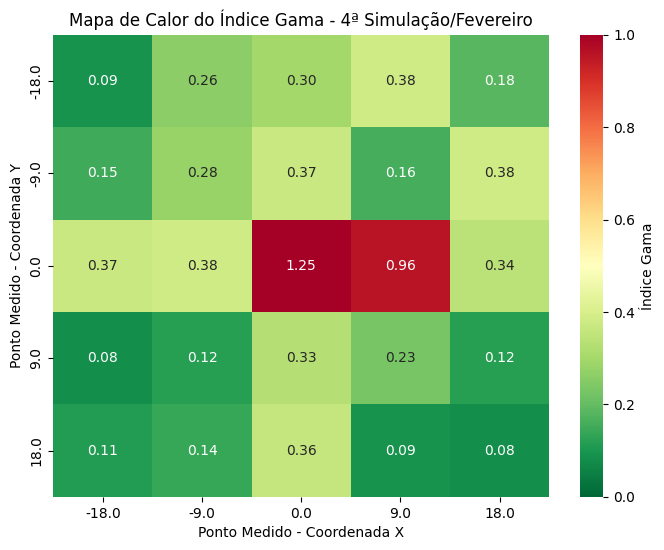

In [1332]:
# Redimensiona o mapa de calor
plt.figure(figsize=(8, 6))

# Cria o mapa de calor usando Seaborn
heatmap = sns.heatmap(df_heatmapDataFebruary_sim_4.pivot_table(index='y', columns='x', values='Índice Gama'), cmap='RdYlGn_r', annot=True, fmt=".2f", cbar_kws={'label': 'Índice Gama'}, vmin=0, vmax=1)

# Define rótulos dos eixos
plt.xlabel('Ponto Medido - Coordenada X')
plt.ylabel('Ponto Medido - Coordenada Y')
plt.title('Mapa de Calor do Índice Gama - 4ª Simulação/Fevereiro')

# Salva o gráfico em um arquivo de imagem (por exemplo, PNG)
plt.savefig(f'heatmapFebruary_sim_4_DTA_{delta_dM}.png')

# Plota o mapa de calor
plt.show()

### Resultados - 5ª Simulação

#### Leitura dos dados

* Lê os dados do arquivo .csv com os dados do mês de Agosto.

In [1333]:
# Leitura dos dados do mês de Agosto refente à 1ª Simulação e criação do Dataframe
february_data_sim_5 = './Fevereiro_23/Matrizes das Simulações para o Programa - Simulação 5 - Fevereiro.csv'
df_februaryData_sim_5 = pd.read_csv(february_data_sim_5)

# Informações do Dataframe dos dados
print(df_februaryData_sim_5.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1225 entries, 0 to 1224
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   TLD                       25 non-null     float64
 1   Dose Medida (Dm)          1225 non-null   int64  
 2   Dose Calculada (Dc)       1225 non-null   int64  
 3   Ponto Medido X (rm_x)     1225 non-null   int64  
 4   Ponto Medido Y (rm_y)     1225 non-null   int64  
 5   Ponto Calculado X (rc_x)  1225 non-null   int64  
 6   Ponto Calculado Y (rc_y)  1225 non-null   int64  
dtypes: float64(1), int64(6)
memory usage: 67.1 KB
None


#### Valores de Gamma-Index

* Analisa os 49 pontos calculados para cada ponto medido calculando o gamma-index para cada um desses pontos,
* Retorna o menor gamma-index dos calculados para cada ponto medido, com seu respectivo ponto medido.

In [1334]:
# Obtém o valor máximo dentre as doses medidas
max_Dm = df_februaryData_sim_5['Dose Medida (Dm)'].max()

# Criação do dicionário que irá salvar os valores gamma-index para cada ponto
gamma_index_feb_5 = {}

In [1335]:
# Calcula os valores de gamma-index de cada ponto e salva no dicionário os menores valores
for i in range(0, len(df_februaryData_sim_5), 49):
    group_df = df_februaryData_sim_5.iloc[i:i+49]  # Selecionar grupo de 49 pontos
    min_gamma = group_df.apply(lambda row: position_module(row, max_Dm), axis=1).min()
       
    # Salva o menor valor de gamma-index no dicionário
    x_coord = group_df.iloc[0]['Ponto Medido X (rm_x)']
    y_coord = group_df.iloc[0]['Ponto Medido Y (rm_y)']
    gamma_index_feb_5['{},{}'.format(x_coord, y_coord)] = min_gamma.round(2)

#### Análise dos valores obtidos

* Retorna quais valores estão 'acima' e 'abaixo ou igual' a 1, classificando-os como 'pontos reprovados' e 'pontos aprovados', respectivamente,
* Também cria um dataframe dos pontos analisados com seus respectivos gamma-index.

In [1336]:
# Contar a quantidade de valores menores ou iguais a 1 e a quantidade de valores maiores que 1
menores_ou_iguais_que_um = sum(1 for valor in gamma_index_feb_5.values() if valor <= 1)

maiores_que_um = sum(1 for valor in gamma_index_feb_5.values() if valor > 1)

# Total de valores do gamma-index
total_valores = len(gamma_index_feb_5)

# Calcular as porcentagens dos valores acima
porcentagem_menores_que_um = (menores_ou_iguais_que_um / total_valores) * 100

porcentagem_maiores_que_um = (maiores_que_um / total_valores) * 100

In [1337]:
# Imprimir os resultados
print("Valores referentes às medidas da 5ª Simulação de Fevereiro")
print()
print("Total de pontos analisados:", total_valores)
print(f"Diferença de percentual de dose: {delta_Dm*100}%")
print(f"DTA utilizado: {delta_dM} mm")
print()
print("Quantidade de valores aprovados, ou seja, menores ou iguais a um:", menores_ou_iguais_que_um)
print("Quantidade de valores reprovados, ou seja, maiores que um:", maiores_que_um)
print()
print(f"Porcentagem de valores aprovados: {porcentagem_menores_que_um}%")
print(f"Porcentagem de valores reprovados: {porcentagem_maiores_que_um}%")

Valores referentes às medidas da 5ª Simulação de Fevereiro

Total de pontos analisados: 25
Diferença de percentual de dose: 2.0%
DTA utilizado: 2.0 mm

Quantidade de valores aprovados, ou seja, menores ou iguais a um: 25
Quantidade de valores reprovados, ou seja, maiores que um: 0

Porcentagem de valores aprovados: 100.0%
Porcentagem de valores reprovados: 0.0%


#### Visualização dos dados tratados

* Visualiza tabela final para cada simulação, com os pontos medido e seu menor valor de gamma-index calculado.

In [1338]:
# Cria um dataframe para os valores obtidos da primeira simulação
df_februaryGammaIndex_sim_5 = pd.DataFrame(list(gamma_index_feb_5.items()), columns=['Pontos Medidos (X,Y)', 'Índice Gama'])

In [1339]:
# Visualiza o DataFrame com os devidos tratamentos
print(df_februaryGammaIndex_sim_5.head(25))

   Pontos Medidos (X,Y)  Índice Gama
0             18.0,18.0         0.08
1              9.0,18.0         0.32
2              0.0,18.0         0.61
3             -9.0,18.0         0.45
4            -18.0,18.0         0.18
5              18.0,9.0         0.42
6               9.0,9.0         0.45
7               0.0,9.0         0.73
8              -9.0,9.0         0.44
9             -18.0,9.0         0.90
10             18.0,0.0         0.35
11              9.0,0.0         0.41
12              0.0,0.0         0.74
13             -9.0,0.0         0.16
14            -18.0,0.0         0.30
15            18.0,-9.0         0.09
16             9.0,-9.0         0.12
17             0.0,-9.0         0.24
18            -9.0,-9.0         0.05
19           -18.0,-9.0         0.11
20           18.0,-18.0         0.08
21            9.0,-18.0         0.07
22            0.0,-18.0         0.47
23           -9.0,-18.0         0.07
24          -18.0,-18.0         0.18


#### Mapas de Calor dos dados tratados

* Visualização dos mapas de calor dos dados finais, onde é possível relacionar o gamma-index retornado por cada ponto com sua coordenada (x, y).
* As cores mais 'frias', ilustradas por tons da cor verde, indicam que o valor do gamma-index é menor, ou seja, mais próximo de zero. Enquanto que as cores mais 'quentes', ilustrada por tons de vermelho, indicam que o valor do gamma-index é mais próximo (ou maior que) de um.

In [1340]:
# Extrai as coordenadas x, y e valores do Gamma Index
x_coords, y_coords = zip(*[map(float, coord.split(',')) for coord in df_februaryGammaIndex_sim_5['Pontos Medidos (X,Y)']])
gamma_index_values = df_februaryGammaIndex_sim_5['Índice Gama']

# Cria um DataFrame para os dados
df_heatmapDataFebruary_sim_5 = pd.DataFrame({'x': x_coords, 'y': y_coords, 'Índice Gama': gamma_index_values})

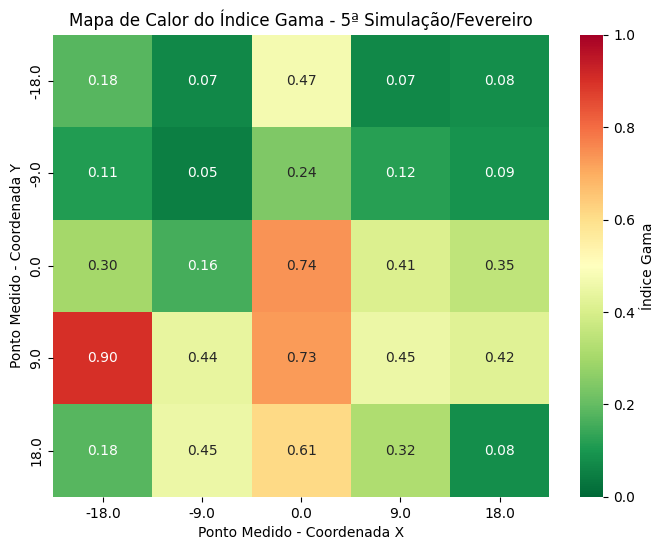

In [1341]:
# Redimensiona o mapa de calor
plt.figure(figsize=(8, 6))

# Cria o mapa de calor usando Seaborn
heatmap = sns.heatmap(df_heatmapDataFebruary_sim_5.pivot_table(index='y', columns='x', values='Índice Gama'), cmap='RdYlGn_r', annot=True, fmt=".2f", cbar_kws={'label': 'Índice Gama'}, vmin=0, vmax=1)

# Define rótulos dos eixos
plt.xlabel('Ponto Medido - Coordenada X')
plt.ylabel('Ponto Medido - Coordenada Y')
plt.title('Mapa de Calor do Índice Gama - 5ª Simulação/Fevereiro')

# Salva o gráfico em um arquivo de imagem (por exemplo, PNG)
plt.savefig(f'heatmapFebruary_sim_5_DTA_{delta_dM}.png')

# Plota o mapa de calor
plt.show()

### Resultados - 6ª Simulação

#### Leitura dos dados

* Lê os dados do arquivo .csv com os dados do mês de Agosto.

In [1342]:
# Leitura dos dados do mês de Agosto refente à 1ª Simulação e criação do Dataframe
february_data_sim_6 = './Fevereiro_23/Matrizes das Simulações para o Programa - Simulação 6 - Fevereiro.csv'
df_februaryData_sim_6 = pd.read_csv(february_data_sim_6)

# Informações do Dataframe dos dados
print(df_februaryData_sim_6.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1225 entries, 0 to 1224
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   TLD                       25 non-null     float64
 1   Dose Medida (Dm)          1225 non-null   int64  
 2   Dose Calculada (Dc)       1225 non-null   int64  
 3   Ponto Medido X (rm_x)     1225 non-null   int64  
 4   Ponto Medido Y (rm_y)     1225 non-null   int64  
 5   Ponto Calculado X (rc_x)  1225 non-null   int64  
 6   Ponto Calculado Y (rc_y)  1225 non-null   int64  
dtypes: float64(1), int64(6)
memory usage: 67.1 KB
None


#### Valores de Gamma-Index

* Analisa os 49 pontos calculados para cada ponto medido calculando o gamma-index para cada um desses pontos,
* Retorna o menor gamma-index dos calculados para cada ponto medido, com seu respectivo ponto medido.

In [1343]:
# Obtém o valor máximo dentre as doses medidas
max_Dm = df_februaryData_sim_6['Dose Medida (Dm)'].max()

# Criação do dicionário que irá salvar os valores gamma-index para cada ponto
gamma_index_feb_6 = {}

In [1344]:
# Calcula os valores de gamma-index de cada ponto e salva no dicionário os menores valores
for i in range(0, len(df_februaryData_sim_6), 49):
    group_df = df_februaryData_sim_6.iloc[i:i+49]  # Selecionar grupo de 49 pontos
    min_gamma = group_df.apply(lambda row: position_module(row, max_Dm), axis=1).min()
       
    # Salva o menor valor de gamma-index no dicionário
    x_coord = group_df.iloc[0]['Ponto Medido X (rm_x)']
    y_coord = group_df.iloc[0]['Ponto Medido Y (rm_y)']
    gamma_index_feb_6['{},{}'.format(x_coord, y_coord)] = min_gamma.round(2)

#### Análise dos valores obtidos

* Retorna quais valores estão 'acima' e 'abaixo ou igual' a 1, classificando-os como 'pontos reprovados' e 'pontos aprovados', respectivamente,
* Também cria um dataframe dos pontos analisados com seus respectivos gamma-index.

In [1345]:
# Contar a quantidade de valores menores ou iguais a 1 e a quantidade de valores maiores que 1
menores_ou_iguais_que_um = sum(1 for valor in gamma_index_feb_6.values() if valor <= 1)

maiores_que_um = sum(1 for valor in gamma_index_feb_6.values() if valor > 1)

# Total de valores do gamma-index
total_valores = len(gamma_index_feb_6)

# Calcular as porcentagens dos valores acima
porcentagem_menores_que_um = (menores_ou_iguais_que_um / total_valores) * 100

porcentagem_maiores_que_um = (maiores_que_um / total_valores) * 100

In [1346]:
# Imprimir os resultados
print("Valores referentes às medidas da 6ª Simulação de Fevereiro")
print()
print("Total de pontos analisados:", total_valores)
print(f"Diferença de percentual de dose: {delta_Dm*100}%")
print(f"DTA utilizado: {delta_dM} mm")
print()
print("Quantidade de valores aprovados, ou seja, menores ou iguais a um:", menores_ou_iguais_que_um)
print("Quantidade de valores reprovados, ou seja, maiores que um:", maiores_que_um)
print()
print(f"Porcentagem de valores aprovados: {porcentagem_menores_que_um}%")
print(f"Porcentagem de valores reprovados: {porcentagem_maiores_que_um}%")

Valores referentes às medidas da 6ª Simulação de Fevereiro

Total de pontos analisados: 25
Diferença de percentual de dose: 2.0%
DTA utilizado: 2.0 mm

Quantidade de valores aprovados, ou seja, menores ou iguais a um: 25
Quantidade de valores reprovados, ou seja, maiores que um: 0

Porcentagem de valores aprovados: 100.0%
Porcentagem de valores reprovados: 0.0%


#### Visualização dos dados tratados

* Visualiza tabela final para cada simulação, com os pontos medido e seu menor valor de gamma-index calculado.

In [1347]:
# Cria um dataframe para os valores obtidos da primeira simulação
df_februaryGammaIndex_sim_6 = pd.DataFrame(list(gamma_index_feb_6.items()), columns=['Pontos Medidos (X,Y)', 'Índice Gama'])

In [1348]:
# Visualiza o DataFrame com os devidos tratamentos
print(df_februaryGammaIndex_sim_6.head(25))

   Pontos Medidos (X,Y)  Índice Gama
0             18.0,18.0         0.21
1              9.0,18.0         0.21
2              0.0,18.0         0.34
3             -9.0,18.0         0.49
4            -18.0,18.0         0.19
5              18.0,9.0         0.48
6               9.0,9.0         0.43
7               0.0,9.0         0.39
8              -9.0,9.0         0.53
9             -18.0,9.0         0.30
10             18.0,0.0         0.25
11              9.0,0.0         0.53
12              0.0,0.0         0.04
13             -9.0,0.0         0.58
14            -18.0,0.0         0.69
15            18.0,-9.0         0.38
16             9.0,-9.0         0.14
17             0.0,-9.0         0.00
18            -9.0,-9.0         0.29
19           -18.0,-9.0         0.11
20           18.0,-18.0         0.10
21            9.0,-18.0         0.50
22            0.0,-18.0         0.73
23           -9.0,-18.0         0.43
24          -18.0,-18.0         0.09


#### Mapas de Calor dos dados tratados

* Visualização dos mapas de calor dos dados finais, onde é possível relacionar o gamma-index retornado por cada ponto com sua coordenada (x, y).
* As cores mais 'frias', ilustradas por tons da cor verde, indicam que o valor do gamma-index é menor, ou seja, mais próximo de zero. Enquanto que as cores mais 'quentes', ilustrada por tons de vermelho, indicam que o valor do gamma-index é mais próximo (ou maior que) de um.

In [1349]:
# Extrai as coordenadas x, y e valores do Gamma Index
x_coords, y_coords = zip(*[map(float, coord.split(',')) for coord in df_februaryGammaIndex_sim_6['Pontos Medidos (X,Y)']])
gamma_index_values = df_februaryGammaIndex_sim_6['Índice Gama']

# Cria um DataFrame para os dados
df_heatmapDataFebruary_sim_6 = pd.DataFrame({'x': x_coords, 'y': y_coords, 'Índice Gama': gamma_index_values})

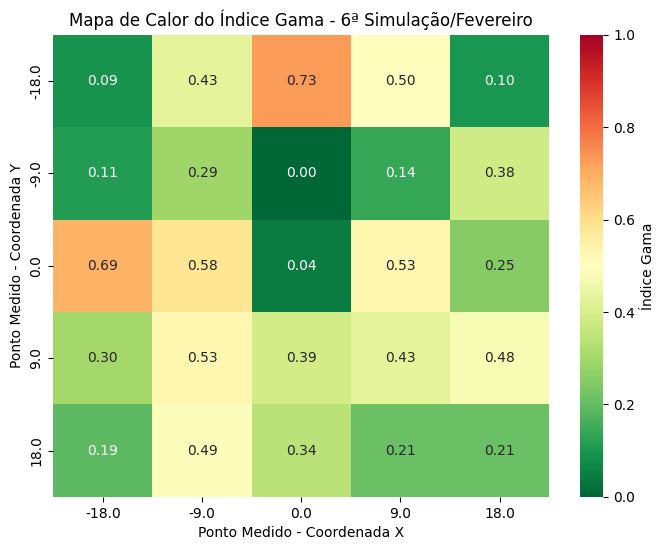

In [1350]:
# Redimensiona o mapa de calor
plt.figure(figsize=(8, 6))

# Cria o mapa de calor usando Seaborn
heatmap = sns.heatmap(df_heatmapDataFebruary_sim_6.pivot_table(index='y', columns='x', values='Índice Gama'), cmap='RdYlGn_r', annot=True, fmt=".2f", cbar_kws={'label': 'Índice Gama'}, vmin=0, vmax=1)

# Define rótulos dos eixos
plt.xlabel('Ponto Medido - Coordenada X')
plt.ylabel('Ponto Medido - Coordenada Y')
plt.title('Mapa de Calor do Índice Gama - 6ª Simulação/Fevereiro')

# Salva o gráfico em um arquivo de imagem (por exemplo, PNG)
plt.savefig(f'heatmapFebruary_sim_6_DTA_{delta_dM}.png')

# Plota o mapa de calor
plt.show()

### Resultados - 7ª Simulação

#### Leitura dos dados

* Lê os dados do arquivo .csv com os dados do mês de Agosto.

In [1351]:
# Leitura dos dados do mês de Agosto refente à 1ª Simulação e criação do Dataframe
february_data_sim_7 = './Fevereiro_23/Matrizes das Simulações para o Programa - Simulação 7 - Fevereiro.csv'
df_februaryData_sim_7 = pd.read_csv(february_data_sim_7)

# Informações do Dataframe dos dados
print(df_februaryData_sim_7.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1225 entries, 0 to 1224
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   TLD                       25 non-null     float64
 1   Dose Medida (Dm)          1225 non-null   int64  
 2   Dose Calculada (Dc)       1225 non-null   int64  
 3   Ponto Medido X (rm_x)     1225 non-null   int64  
 4   Ponto Medido Y (rm_y)     1225 non-null   int64  
 5   Ponto Calculado X (rc_x)  1225 non-null   int64  
 6   Ponto Calculado Y (rc_y)  1225 non-null   int64  
dtypes: float64(1), int64(6)
memory usage: 67.1 KB
None


#### Valores de Gamma-Index

* Analisa os 49 pontos calculados para cada ponto medido calculando o gamma-index para cada um desses pontos,
* Retorna o menor gamma-index dos calculados para cada ponto medido, com seu respectivo ponto medido.

In [1352]:
# Obtém o valor máximo dentre as doses medidas
max_Dm = df_februaryData_sim_7['Dose Medida (Dm)'].max()

# Criação do dicionário que irá salvar os valores gamma-index para cada ponto
gamma_index_feb_7 = {}

In [1353]:
# Calcula os valores de gamma-index de cada ponto e salva no dicionário os menores valores
for i in range(0, len(df_februaryData_sim_7), 49):
    group_df = df_februaryData_sim_7.iloc[i:i+49]  # Selecionar grupo de 49 pontos
    min_gamma = group_df.apply(lambda row: position_module(row, max_Dm), axis=1).min()
       
    # Salva o menor valor de gamma-index no dicionário
    x_coord = group_df.iloc[0]['Ponto Medido X (rm_x)']
    y_coord = group_df.iloc[0]['Ponto Medido Y (rm_y)']
    gamma_index_feb_7['{},{}'.format(x_coord, y_coord)] = min_gamma.round(2)

#### Análise dos valores obtidos

* Retorna quais valores estão 'acima' e 'abaixo ou igual' a 1, classificando-os como 'pontos reprovados' e 'pontos aprovados', respectivamente,
* Também cria um dataframe dos pontos analisados com seus respectivos gamma-index.

In [1354]:
# Contar a quantidade de valores menores ou iguais a 1 e a quantidade de valores maiores que 1
menores_ou_iguais_que_um = sum(1 for valor in gamma_index_feb_7.values() if valor <= 1)

maiores_que_um = sum(1 for valor in gamma_index_feb_7.values() if valor > 1)

# Total de valores do gamma-index
total_valores = len(gamma_index_feb_7)

# Calcular as porcentagens dos valores acima
porcentagem_menores_que_um = (menores_ou_iguais_que_um / total_valores) * 100

porcentagem_maiores_que_um = (maiores_que_um / total_valores) * 100

In [1355]:
# Imprimir os resultados
print("Valores referentes às medidas da 7ª Simulação de Fevereiro")
print()
print("Total de pontos analisados:", total_valores)
print(f"Diferença de percentual de dose: {delta_Dm*100}%")
print(f"DTA utilizado: {delta_dM} mm")
print()
print("Quantidade de valores aprovados, ou seja, menores ou iguais a um:", menores_ou_iguais_que_um)
print("Quantidade de valores reprovados, ou seja, maiores que um:", maiores_que_um)
print()
print(f"Porcentagem de valores aprovados: {porcentagem_menores_que_um}%")
print(f"Porcentagem de valores reprovados: {porcentagem_maiores_que_um}%")

Valores referentes às medidas da 7ª Simulação de Fevereiro

Total de pontos analisados: 25
Diferença de percentual de dose: 2.0%
DTA utilizado: 2.0 mm

Quantidade de valores aprovados, ou seja, menores ou iguais a um: 25
Quantidade de valores reprovados, ou seja, maiores que um: 0

Porcentagem de valores aprovados: 100.0%
Porcentagem de valores reprovados: 0.0%


#### Visualização dos dados tratados

* Visualiza tabela final para cada simulação, com os pontos medido e seu menor valor de gamma-index calculado.

In [1356]:
# Cria um dataframe para os valores obtidos da primeira simulação
df_februaryGammaIndex_sim_7 = pd.DataFrame(list(gamma_index_feb_7.items()), columns=['Pontos Medidos (X,Y)', 'Índice Gama'])

In [1357]:
# Visualiza o DataFrame com os devidos tratamentos
print(df_februaryGammaIndex_sim_7.head(25))

   Pontos Medidos (X,Y)  Índice Gama
0             18.0,18.0         0.18
1              9.0,18.0         0.46
2              0.0,18.0         0.41
3             -9.0,18.0         0.42
4            -18.0,18.0         0.22
5              18.0,9.0         0.06
6               9.0,9.0         0.63
7               0.0,9.0         0.76
8              -9.0,9.0         0.84
9             -18.0,9.0         0.22
10             18.0,0.0         0.68
11              9.0,0.0         0.44
12              0.0,0.0         0.55
13             -9.0,0.0         0.77
14            -18.0,0.0         0.84
15            18.0,-9.0         0.39
16             9.0,-9.0         0.21
17             0.0,-9.0         0.41
18            -9.0,-9.0         0.29
19           -18.0,-9.0         0.07
20           18.0,-18.0         0.14
21            9.0,-18.0         0.52
22            0.0,-18.0         0.27
23           -9.0,-18.0         0.10
24          -18.0,-18.0         0.20


#### Mapas de Calor dos dados tratados

* Visualização dos mapas de calor dos dados finais, onde é possível relacionar o gamma-index retornado por cada ponto com sua coordenada (x, y).
* As cores mais 'frias', ilustradas por tons da cor verde, indicam que o valor do gamma-index é menor, ou seja, mais próximo de zero. Enquanto que as cores mais 'quentes', ilustrada por tons de vermelho, indicam que o valor do gamma-index é mais próximo (ou maior que) de um.

In [1358]:
# Extrai as coordenadas x, y e valores do Gamma Index
x_coords, y_coords = zip(*[map(float, coord.split(',')) for coord in df_februaryGammaIndex_sim_7['Pontos Medidos (X,Y)']])
gamma_index_values = df_februaryGammaIndex_sim_7['Índice Gama']

# Cria um DataFrame para os dados
df_heatmapDataFebruary_sim_7 = pd.DataFrame({'x': x_coords, 'y': y_coords, 'Índice Gama': gamma_index_values})

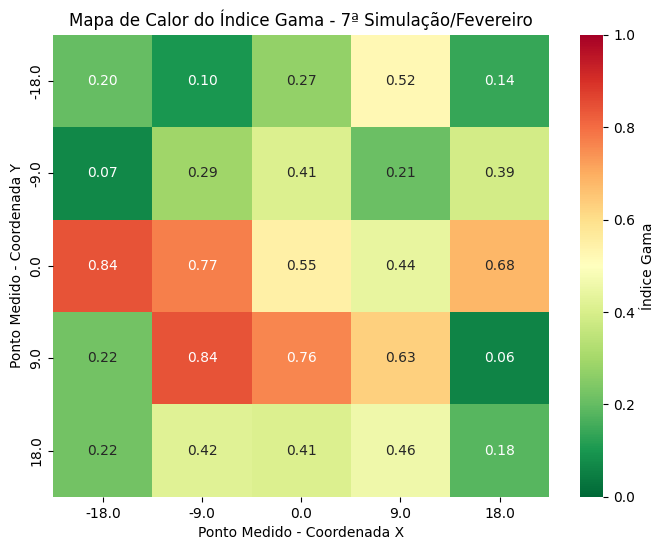

In [1359]:
# Redimensiona o mapa de calor
plt.figure(figsize=(8, 6))

# Cria o mapa de calor usando Seaborn
heatmap = sns.heatmap(df_heatmapDataFebruary_sim_7.pivot_table(index='y', columns='x', values='Índice Gama'), cmap='RdYlGn_r', annot=True, fmt=".2f", cbar_kws={'label': 'Índice Gama'}, vmin=0, vmax=1)

# Define rótulos dos eixos
plt.xlabel('Ponto Medido - Coordenada X')
plt.ylabel('Ponto Medido - Coordenada Y')
plt.title('Mapa de Calor do Índice Gama - 7ª Simulação/Fevereiro')

# Salva o gráfico em um arquivo de imagem (por exemplo, PNG)
plt.savefig(f'heatmapFebruary_sim_7_DTA_{delta_dM}.png')

# Plota o mapa de calor
plt.show()

## *Salvando os Resultados*

* Abaixo os resultados de cada mês são salvos em um arquivo no formato .xlsx (Excel), com os resultados das simulações em abas diferentes.

### Agosto

In [1360]:
# Criando um arquivo em formato Excel para os resultados referentes ao mês de agosto
with pd.ExcelWriter('Resultados_Analises_Programa_Agosto.xlsx', engine='xlsxwriter') as writer:

    # Salvando os DataFrames de cada simulação em uma aba chamada diferente
    df_augustGammaIndex_sim_1.to_excel(writer, sheet_name='Resultados - 1ª Sim_Agosto', index=False)
    
    df_augustGammaIndex_sim_2.to_excel(writer, sheet_name='Resultados - 2ª Sim_Agosto', index=False)
    
    df_augustGammaIndex_sim_3.to_excel(writer, sheet_name='Resultados - 3ª Sim_Agosto', index=False)
    
    df_augustGammaIndex_sim_4.to_excel(writer, sheet_name='Resultados - 4ª Sim_Agosto', index=False)
    
    df_augustGammaIndex_sim_5.to_excel(writer, sheet_name='Resultados - 5ª Sim_Agosto', index=False)
    
    df_augustGammaIndex_sim_6.to_excel(writer, sheet_name='Resultados - 6ª Sim_Agosto', index=False)
    
    df_augustGammaIndex_sim_7.to_excel(writer, sheet_name='Resultados - 7ª Sim_Agosto', index=False)

### Fevereiro

In [1361]:
# Criando um arquivo em formato Excel para os resultados referentes ao mês de fevereiro
with pd.ExcelWriter('Resultados_Analises_Programa_Fevereiro.xlsx', engine='xlsxwriter') as writer:

    # Salvando os DataFrames de cada simulação em uma aba chamada diferente
    df_februaryGammaIndex_sim_1.to_excel(writer, sheet_name='Resultados - 1ª Sim_Fevereiro', index=False)
    
    df_februaryGammaIndex_sim_2.to_excel(writer, sheet_name='Resultados - 2ª Sim_Fevereiro', index=False)
    
    df_februaryGammaIndex_sim_3.to_excel(writer, sheet_name='Resultados - 3ª Sim_Fevereiro', index=False)
    
    df_februaryGammaIndex_sim_4.to_excel(writer, sheet_name='Resultados - 4ª Sim_Fevereiro', index=False)
    
    df_februaryGammaIndex_sim_5.to_excel(writer, sheet_name='Resultados - 5ª Sim_Fevereiro', index=False)
    
    df_februaryGammaIndex_sim_6.to_excel(writer, sheet_name='Resultados - 6ª Sim_Fevereiro', index=False)
    
    df_februaryGammaIndex_sim_7.to_excel(writer, sheet_name='Resultados - 7ª Sim_Fevereiro', index=False)